### prepare df cleaned

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [94]:
df_odds_train = pd.read_csv("player_features_train_with_odds_20250606.csv")
df_odds_test = pd.read_csv("player_features_test_with_odds_20250606.csv")
df = df_odds_train.copy()

In [95]:
df.drop(columns=[ 'dayofweek', 'venue', 'result', 'team', 'opponent',
        'minutes', 'goals', 'assists', 'pens_made',
       'pens_att', 'shots', 'shots_on_target', 'cards_yellow', 'cards_red',
       'touches', 'tackles', 'interceptions', 'blocks', 'xg', 'npxg',
       'xg_assist', 'sca', 'gca', 'passes_completed', 'passes_pct',
       'progressive_passes', 'carries', 'progressive_carries', 'take_ons',
       'take_ons_won', 'player_id', 'stat_type', 'season',
        'match_id', 'player_match_id',
       'season_start_year', 'is_transfer_season', 'team_strength',
        'team_offensive_strength','team_elo', 'opponent_elo',
       'strength_diff', 'season_year',
       'next_game_team','odds_price_betmgm', 'odds_price_betrivers', 'odds_price_bovada',
       'odds_price_draftkings', 'odds_price_fanduel',
       'next_game_opponent', 'next_game_minutes'], inplace=True)

cols = [
    "next_game_odds_price_betmgm",
    "next_game_odds_price_betrivers",
    "next_game_odds_price_bovada",
    "next_game_odds_price_draftkings",
    "next_game_odds_price_fanduel",
]

arr = df[cols].to_numpy(dtype=float)

row_means = np.nanmean(arr, axis=1)

row_means = np.where(np.isnan(row_means), 1.0, row_means)

mask = np.isnan(arr)
arr[mask] = np.take(row_means, np.where(mask)[0])

df[cols] = arr
temp = df.drop(columns=cols).dropna()
df = df.iloc[temp.index]

df.to_csv("df_cleaned.csv", index=False)

/tmp/ipykernel_159693/2005430204.py:26: RuntimeWarning: Mean of empty slice
  row_means = np.nanmean(arr, axis=1)


In [96]:
# df_test = pd.read_csv("player_features_test_20250528.csv")
df_test = pd.read_csv("player_features_test_with_odds_20250606.csv")
# df_test_odds = df_test_odds[["player_id", "player_name", 'date', 'team', 'next_game_odds_price_betmgm',
# 	   'next_game_odds_price_betrivers', 'next_game_odds_price_bovada',
# 	   'next_game_odds_price_draftkings', 'next_game_odds_price_fanduel']]
# df_test = df_test.merge(df_test_odds, on=["player_id", "player_name", "date", "team"], how="left")

arr = df_test[cols].to_numpy(dtype=float)

row_means = np.nanmean(arr, axis=1)

row_means = np.where(np.isnan(row_means), 1.0, row_means)

mask = np.isnan(arr)
arr[mask] = np.take(row_means, np.where(mask)[0])

df_test[cols] = arr

/tmp/ipykernel_159693/1628297586.py:10: RuntimeWarning: Mean of empty slice
  row_means = np.nanmean(arr, axis=1)


In [97]:
df_test.rename(columns={"is_post_transfer": "is_post_transfer_match"}, inplace=True)
df_test = df_test[df.columns]
df_test = df_test.dropna()
print(len(df_test[df_test['is_post_transfer_match'] == True]))
df_test.to_csv("df_test_cleaned.csv", index=False)

11359


### eda

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------------
# 1. Lecture du DataFrame
# ------------------------------------------------------------------------
# Remplacez le chemin si nécessaire
df = pd.read_csv("player_features_20250409_cleaned.csv")

# ------------------------------------------------------------------------
# 2. Exploration initiale
# ------------------------------------------------------------------------
# Dimensions du DataFrame
print("Dimensions du DataFrame : ", df.shape)

# Aperçu des premières lignes
print("\nAperçu du DataFrame :")
print(df.head())

# Types de données et informations générales
print("\nInformations sur le DataFrame :")
df.info()

# Statistiques descriptives de base pour les variables numériques
print("\nStatistiques descriptives (variables numériques) :")
print(df.describe())

# Regardons aussi les colonnes "object"/"category" (catégorielles)
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
if len(categorical_cols) > 0:
    print("\nColonnes catégorielles (aperçu des modalités) :")
    for col in categorical_cols:
        print(f"\nColonne : {col}")
        print(df[col].value_counts(dropna=False))



Dimensions du DataFrame :  (108731, 45)

Aperçu du DataFrame :
         date         round game_started position   player_name  league  \
0  2022-02-26  Matchweek 27            Y       LM  Aaron Hickey  SerieA   
1  2021-10-02   Matchweek 7            Y       RM  Aaron Lennon     EPL   
2  2021-12-01  Matchweek 14            N       RM  Aaron Lennon     EPL   
3  2021-12-12  Matchweek 16            N       LM  Aaron Lennon     EPL   
4  2021-12-30  Matchweek 20            Y       FW  Aaron Lennon     EPL   

   is_post_transfer_match  is_home_next_game  target_scored_next_game  \
0                   False                0.0                        0   
1                   False                0.0                        0   
2                   False                1.0                        0   
3                   False                0.0                        1   
4                   False                0.0                        0   

  next_game_date  strength_diff_next_game  team


Répartition de la variable cible 'target_scored_next_game':
target_scored_next_game
0    95709
1    13022
Name: count, dtype: int64


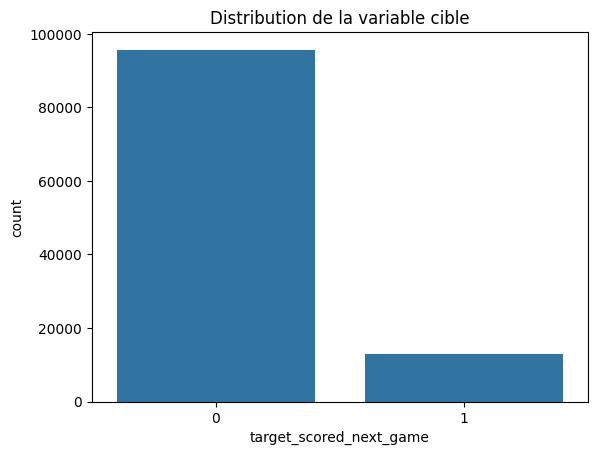

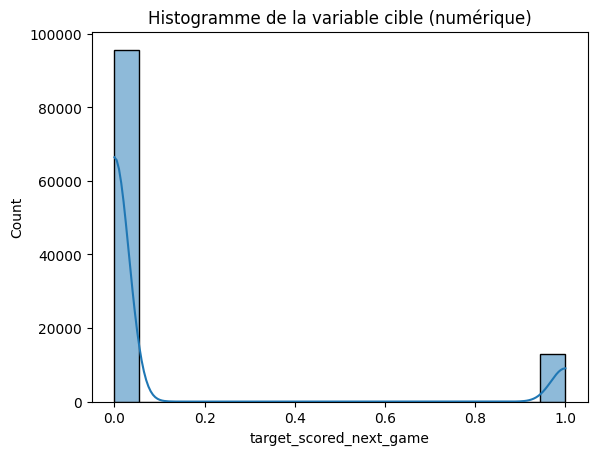

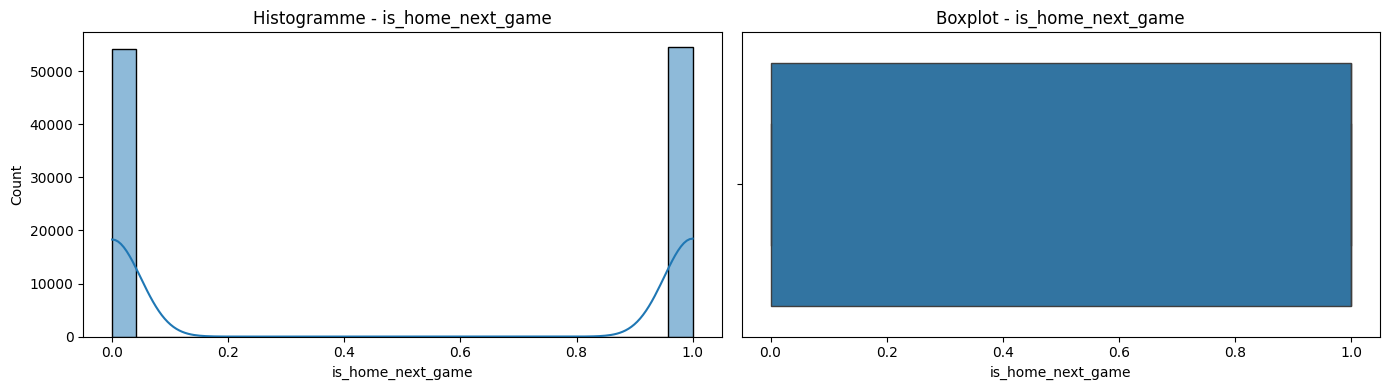

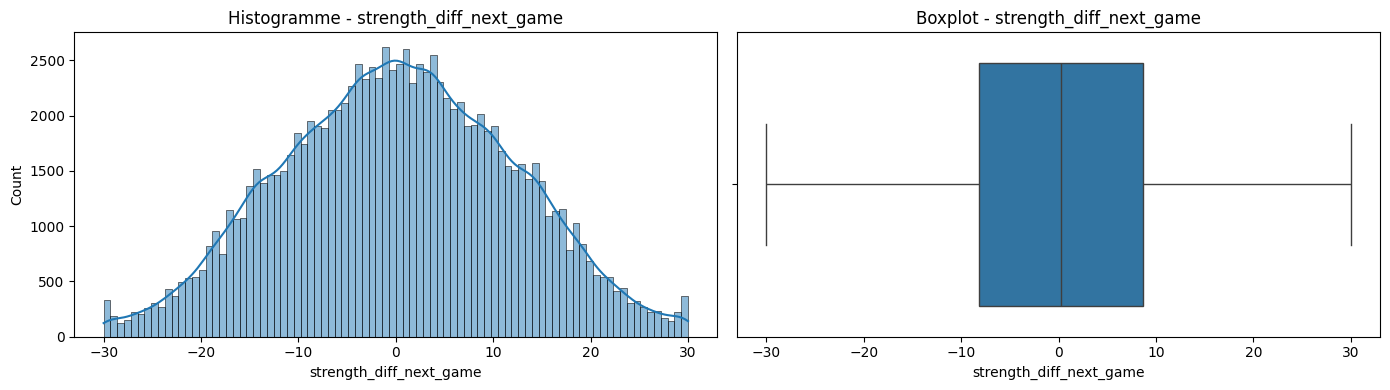

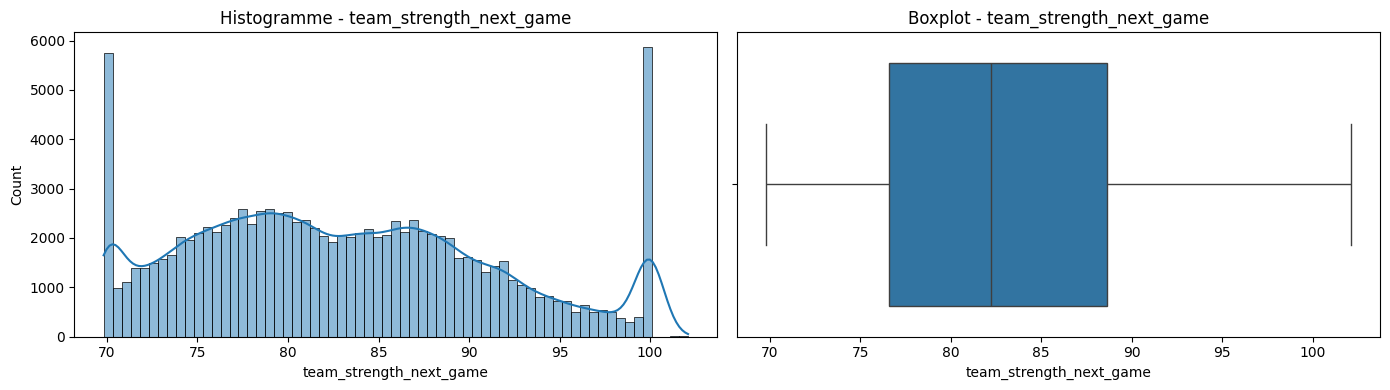

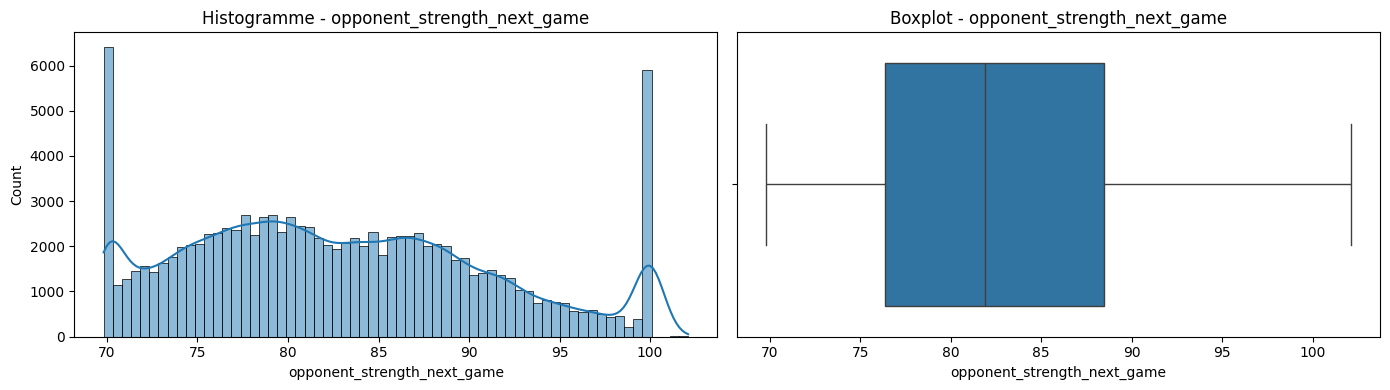

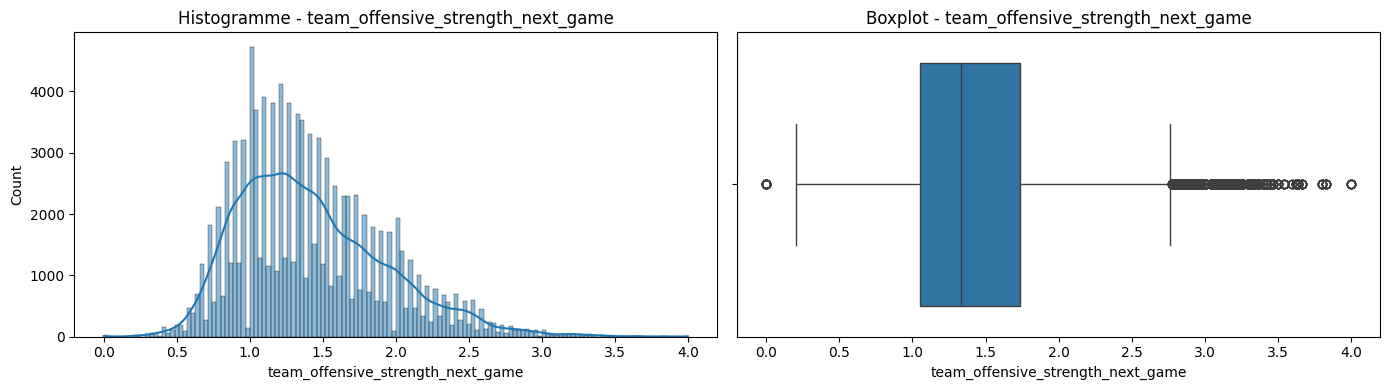

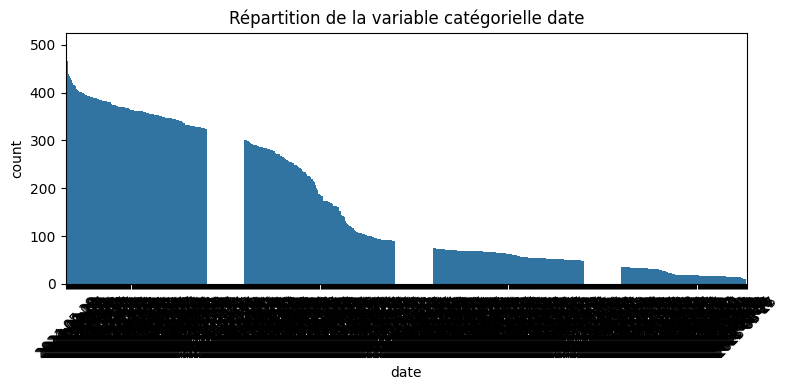

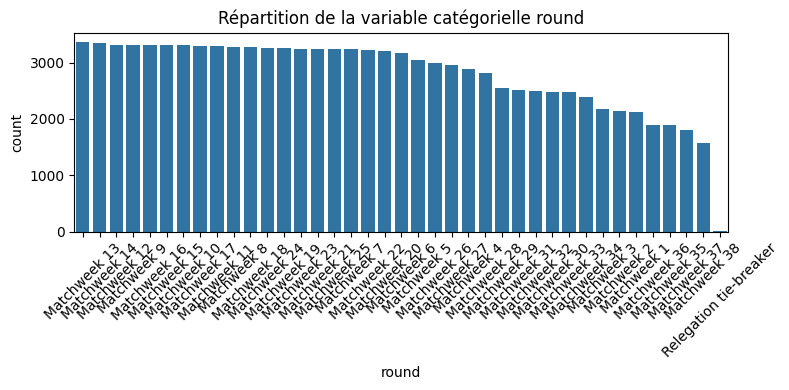

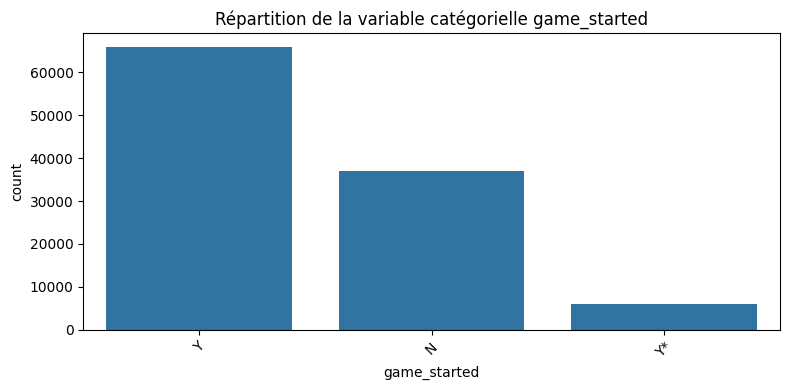

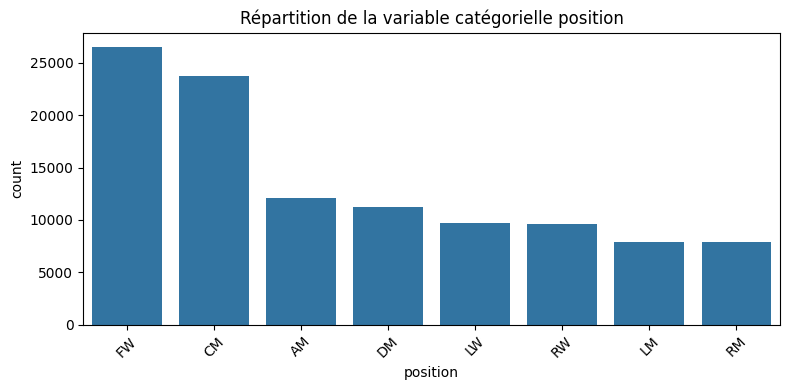

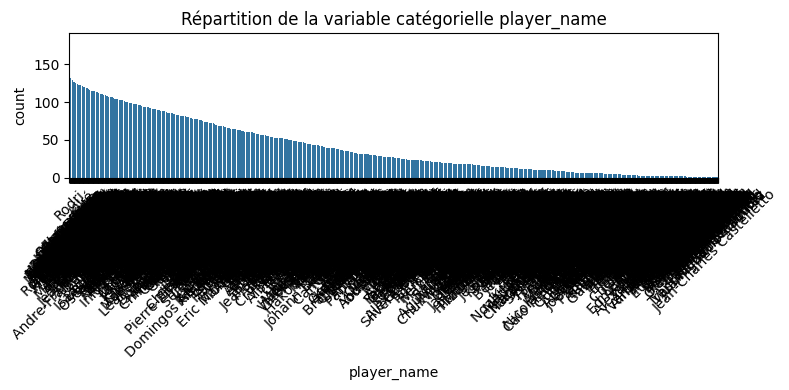

In [19]:

# ------------------------------------------------------------------------
# 4. Distribution de la variable cible
# ------------------------------------------------------------------------
# Supposons que la variable cible s'appelle "target_score_next_game"
target_col = "target_scored_next_game"
if target_col in df.columns:
    print(f"\nRépartition de la variable cible '{target_col}':")
    print(df[target_col].value_counts(dropna=False))

    # Distribution de la variable cible
    plt.figure()
    sns.countplot(data=df, x=target_col)
    plt.title("Distribution de la variable cible")
    plt.show()

    if df[target_col].dtype in [np.float64, np.int64]:
        plt.figure()
        sns.histplot(data=df, x=target_col, kde=True)
        plt.title("Histogramme de la variable cible (numérique)")
        plt.show()

# ------------------------------------------------------------------------
# 5. Distribution des variables numériques
# ------------------------------------------------------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols[:10]:
    numeric_cols.remove(target_col) 

# Exemple de distribution pour chaque variable numérique (histogrammes + boxplots)
for col in numeric_cols[:5]:
    plt.figure(figsize=(14, 4))

    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Histogramme - {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------------
# 6. Distribution des variables catégorielles
# ------------------------------------------------------------------------
for col in categorical_cols[:5]:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Répartition de la variable catégorielle {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


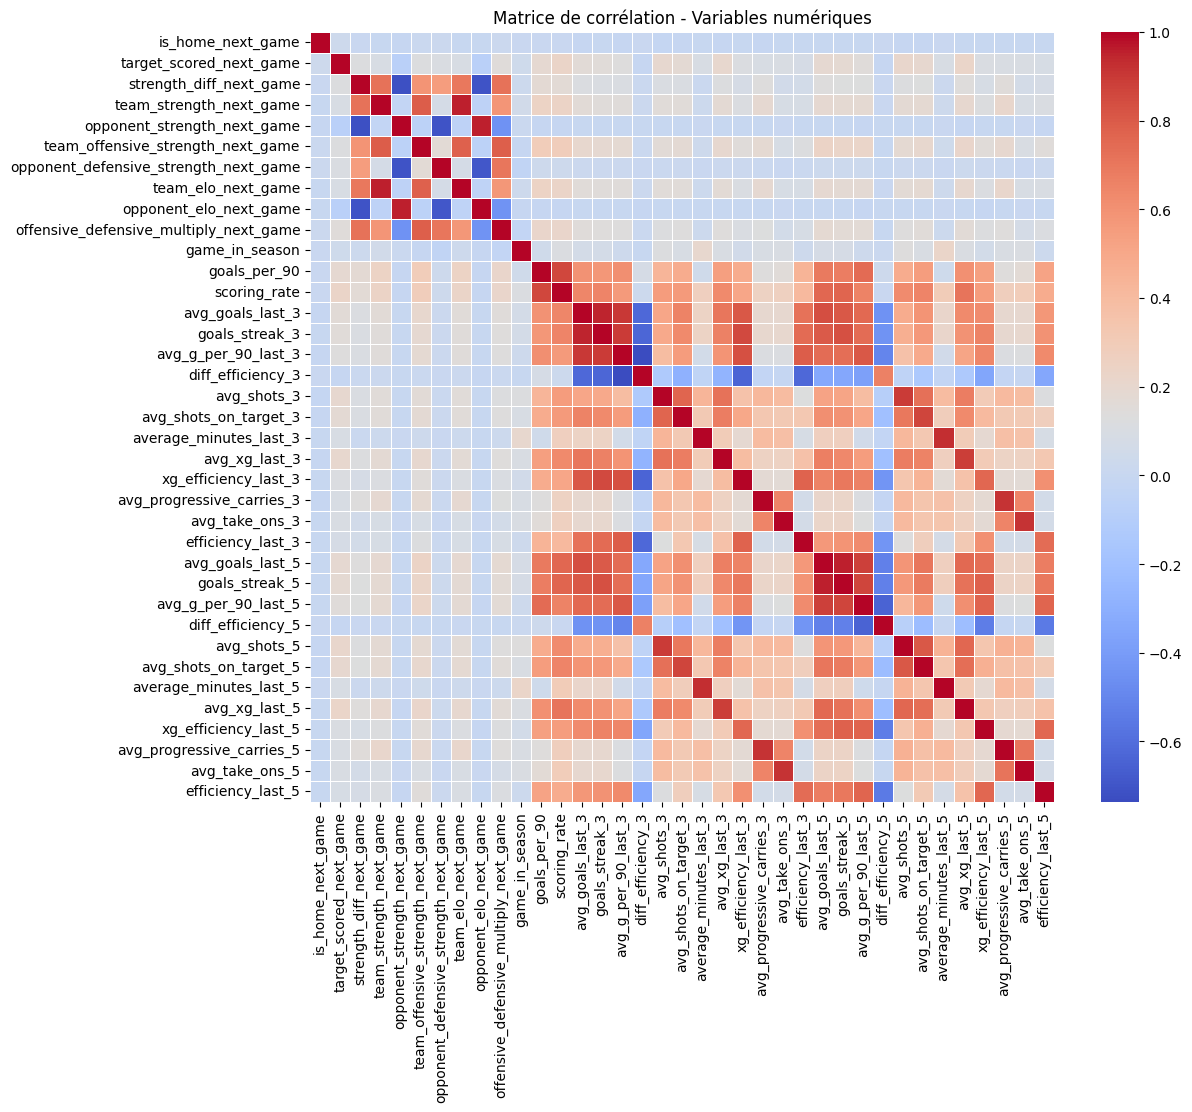


Corrélation de chaque variable numérique avec la cible 'target_scored_next_game' :
target_scored_next_game                   1.000000
scoring_rate                              0.228574
avg_xg_last_5                             0.222748
avg_shots_5                               0.212077
avg_xg_last_3                             0.202405
avg_shots_on_target_5                     0.199656
avg_shots_3                               0.194353
avg_goals_last_5                          0.190081
goals_per_90                              0.189644
goals_streak_5                            0.183149
avg_shots_on_target_3                     0.177041
avg_goals_last_3                          0.164563
goals_streak_3                            0.158610
offensive_defensive_multiply_next_game    0.150278
avg_g_per_90_last_5                       0.149919
avg_g_per_90_last_3                       0.132687
team_offensive_strength_next_game         0.121852
strength_diff_next_game                   0.12035

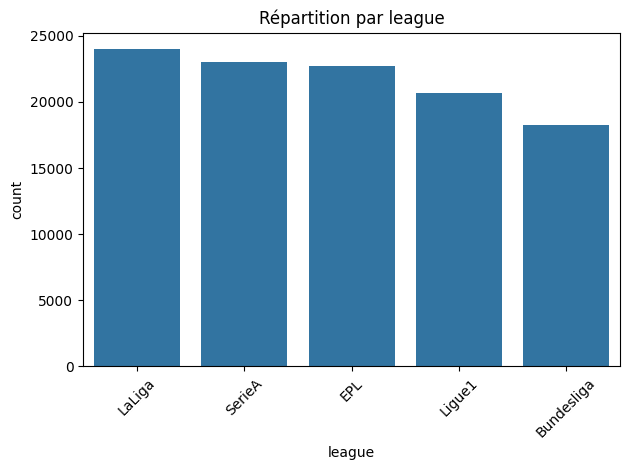


Moyenne de la cible 'target_scored_next_game' par league :
league
EPL           0.130895
Bundesliga    0.130404
Ligue1        0.119969
SerieA        0.113928
LaLiga        0.106547
Name: target_scored_next_game, dtype: float64


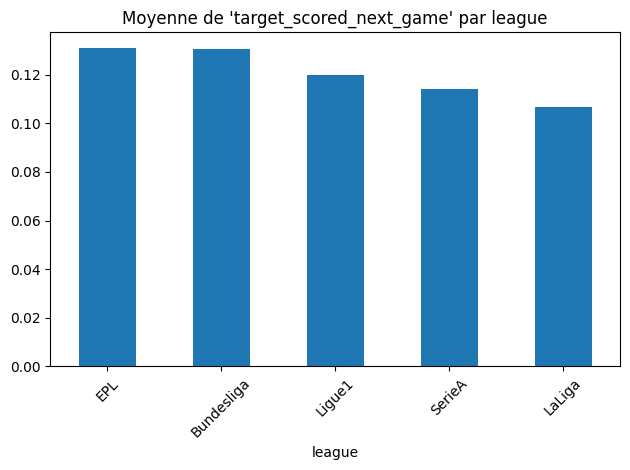

In [20]:
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation - Variables numériques")
plt.show()

# ------------------------------------------------------------------------
# 8. Corrélation avec la variable cible
# ------------------------------------------------------------------------

if df[target_col].dtype in [np.float64, np.int64]:
    # Corrélation numérique
    target_correlations = corr_matrix[target_col].sort_values(ascending=False)
    print(f"\nCorrélation de chaque variable numérique avec la cible '{target_col}' :")
    print(target_correlations)
else:

    if df[target_col].nunique() == 2:
        print("\nLa cible semble binaire. On peut calculer la moyenne de chaque variable numérique par classe de la cible.")
        for col in numeric_cols:
            group_mean = df.groupby(target_col)[col].mean()
            print(f"{col}:")
            print(group_mean)
            print("---")

# ------------------------------------------------------------------------
# 9. Analyse par championnat (ou autre segmentation pertinente)
# ------------------------------------------------------------------------

segment_col = "league"                                   # Ajustez selon vos colonnes
if segment_col in df.columns:
    print(f"\nAnalyse par championnat : {segment_col}")

    # Distribution du nombre de joueurs/matchs par championnat
    plt.figure()
    sns.countplot(data=df, x=segment_col, order=df[segment_col].value_counts().index)
    plt.title(f"Répartition par {segment_col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # On peut aussi regarder la moyenne du target_score_next_game par championnat
    if df[target_col].dtype in [np.float64, np.int64]:
    
        mean_by_champ = df.groupby(segment_col)[target_col].mean().sort_values(ascending=False)
        print(f"\nMoyenne de la cible '{target_col}' par {segment_col} :")
        print(mean_by_champ)
        
        plt.figure()
        mean_by_champ.plot(kind='bar')
        plt.title(f"Moyenne de '{target_col}' par {segment_col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    elif df[target_col].nunique() == 2:
      
        rate_by_champ = df.groupby(segment_col)[target_col].mean().sort_values(ascending=False)
        print(f"\nTaux de 1 de la cible '{target_col}' par {segment_col} :")
        print(rate_by_champ)
        
        plt.figure()
        rate_by_champ.plot(kind='bar')
        plt.title(f"Taux de 1 de la cible '{target_col}' par {segment_col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# ------------------------------------------------------------------------
# 10. Relations bivariées supplémentaires (exemples)
# ------------------------------------------------------------------------

# if len(numeric_cols) > 1:
#     col_x = numeric_cols[0]
#     col_y = numeric_cols[1]
#     plt.figure()
#     sns.scatterplot(data=df, x=col_x, y=col_y, hue=target_col if df[target_col].nunique() < 10 else None)
#     plt.title(f"Relation entre {col_x} et {col_y} (hue={target_col})")
#     plt.show()

### suite eda

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# On réduit la taille pour l'affichage
df_sample = df.sample(10000, random_state=42)

# Détection des variables numériques
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Statistiques descriptives
desc_stats = df[numeric_cols].describe()

# Corrélations avec la variable cible
target_corr = df[numeric_cols].corr()['target_scored_next_game'].sort_values(ascending=False)


# Affichage des résultats dans l'interface
import ace_tools_open as tools; tools.display_dataframe_to_user(name="Random DataFrame", dataframe=df)

# On retourne aussi la liste des plus fortes corrélations avec la cible
target_corr.head(10), target_corr.tail(10)


 Les variables liées au volume de jeu collectif, au niveau de l’adversaire, ou au profil défensif sont négativement liées aux chances de marquer.



On voit clairement que les xG, tirs récents, buts récents sont de bons indicateurs d’un futur but.

In [ ]:
# Préparer un sous-échantillon pour les visualisations
df_viz = df.sample(10000, random_state=1)

# 1. Heatmap des corrélations des 15 variables les plus corrélées avec la cible
top_corr_vars = target_corr.abs().sort_values(ascending=False).head(15).index.tolist()
corr_matrix = df_viz[top_corr_vars].corr()

# Tracer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("🔍 Corrélation entre les variables les plus liées à 'target_scored_next_game'")
plt.tight_layout()
plt.show()


On observe un noyau très cohérent autour des performances offensives récentes :

avg_xg_last_5, scoring_rate, avg_goals_last_5, goals_per_90, etc. sont toutes positivement corrélées entre elles et avec la cible.

Ces variables capturent des dynamiques récentes de forme et d’efficacité offensive.

In [ ]:
# Choix des variables les plus pertinentes pour l'analyse visuelle
top_features = [
    "avg_xg_last_5", "goals_per_90", "scoring_rate", 
    "avg_shots_5", "avg_xg_last_3", "avg_shots_on_target_5"
]

# Histogrammes et boxplots selon la variable cible
for col in top_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogramme
    sns.histplot(data=df_viz, x=col, hue="target_scored_next_game", kde=True, ax=axes[0], element="step", stat="density")
    axes[0].set_title(f"Distribution de {col} selon la cible")
    
    # Boxplot
    sns.boxplot(data=df_viz, x="target_scored_next_game", y=col, ax=axes[1])
    axes[1].set_title(f"Boxplot de {col} selon la cible")

    plt.tight_layout()
    plt.show()


avg_xg_last_5 (xG moyen sur 5 matchs) :
Distribution clairement décalée vers la droite chez les joueurs qui marquent ensuite.

Plus le joueur a généré de xG récemment, plus il est probable qu’il marque.

goals_per_90 :
Les buteurs réguliers (haut G/90) ont une probabilité accrue de continuer à marquer.

scoring_rate :
Ce ratio (buts / tirs) est un bon indicateur d’efficacité. Les joueurs efficaces marquent plus souvent ensuite.

avg_shots_5 :
Les joueurs qui tentent beaucoup leur chance sont logiquement ceux qui ont plus de chances de marquer.

avg_xg_last_3 et avg_shots_on_target_5 :
Même tendance : la forme récente offensive (xG ou tirs cadrés) est fortement prédictive.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Préparer les données
features = top_corr_vars[1:]  # Exclure la target elle-même
X = df[features]
y = df['target_scored_next_game']

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner une Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Importance des variables
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# Affichage graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("🎯 Importance des variables dans la prédiction d'un but au prochain match")
plt.xlabel("Importance (Random Forest)")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# On garde les 6 variables les plus importantes
selected_features = importances.head(6).index.tolist()
X_selected = df[selected_features]

# Régression logistique
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_selected, y)

# Coefficients du modèle
coeffs = pd.Series(log_model.coef_[0], index=selected_features)
intercept = log_model.intercept_[0]

# Construction de la formule en LaTeX
formula = f"P(goal_next_game) = 1 / (1 + exp(-({intercept:.3f}"
for var, coef in coeffs.items():
    formula += f" + {coef:.3f}*{var}"
formula += ")))"

formula


In [ ]:
# Liste des ligues disponibles
ligues = df['league'].value_counts()

# Calcul des statistiques moyennes par ligue
league_stats = df.groupby('league')[
    [
        "goals_per_90", "scoring_rate", "avg_xg_last_5", "avg_shots_5", 
        "avg_shots_on_target_5", "avg_goals_last_5", "xg_efficiency_last_5"
    ]
].mean().sort_values(by="goals_per_90", ascending=False)

# Affichage des stats par ligue
tools.display_dataframe_to_user(name="Comparaison des championnats (moyennes)", dataframe=league_stats)

# Préparation pour les graphiques
melted = df[df['league'].isin(league_stats.index)].melt(
    id_vars="league",
    value_vars=[
        "goals_per_90", "scoring_rate", "avg_xg_last_5", "avg_shots_5", 
        "avg_shots_on_target_5", "avg_goals_last_5", "xg_efficiency_last_5"
    ],
    var_name="statistique",
    value_name="valeur"
)

# On échantillonne pour les graphiques (sinon trop de points)
melted_sample = melted.sample(30000, random_state=42)

# Création de boxplots comparatifs
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_sample, x="statistique", y="valeur", hue="league")
plt.xticks(rotation=45)
plt.title("Comparaison des statistiques par championnat")
plt.tight_layout()
plt.show()


In [ ]:

from math import pi
from sklearn.preprocessing import MinMaxScaler

# Grouping by league for average stats
league_stats = df.groupby('league')[
    [
        "goals_per_90", "scoring_rate", "avg_xg_last_5", "avg_shots_5", 
        "avg_shots_on_target_5", "avg_goals_last_5", "xg_efficiency_last_5"
    ]
].mean().sort_values(by="goals_per_90", ascending=False)

# Normalisation des données
scaler = MinMaxScaler()
league_stats_scaled = pd.DataFrame(
    scaler.fit_transform(league_stats),
    index=league_stats.index,
    columns=league_stats.columns
)

# Radar chart
num_vars = len(league_stats.columns)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Radar plot
plt.figure(figsize=(14, 10))
for league in league_stats_scaled.index:
    values = league_stats_scaled.loc[league].tolist()
    values += values[:1]
    plt.polar(angles, values, label=league, linewidth=2)

plt.xticks(angles[:-1], league_stats.columns, fontsize=10)
plt.title("🕸️ Radar comparatif des championnats (statistiques offensives)", size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


In [ ]:
# Conversion de la date
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df["season_year"] = pd.to_datetime(df["season_year"], format="%Y", errors='coerce')

# Agrégation par mois et ligue
df["month"] = df["date"].dt.to_period("M")
monthly_stats = df.groupby(["month", "league"])[
    ["goals_per_90", "scoring_rate", "avg_xg_last_5"]
].mean().reset_index()

# Passage au format datetime pour l’axe des abscisses
monthly_stats["month"] = monthly_stats["month"].dt.to_timestamp()

# Visualisation de l'évolution temporelle
fig, axes = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

for i, col in enumerate(["goals_per_90", "scoring_rate", "avg_xg_last_5"]):
    sns.lineplot(data=monthly_stats, x="month", y=col, hue="league", ax=axes[i])
    axes[i].set_title(f"Évolution de {col} par ligue")
    axes[i].set_ylabel(col)
    axes[i].set_xlabel("Date")
    axes[i].legend(title="Ligue", loc="upper left")

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

league_stats = df.groupby('league')[
    ["goals_per_90","xg","shots","shots_on_target","carries", "xg_efficiency_last_5","xg_assist"]
].mean().sort_values(by="goals_per_90", ascending=False)
# 2. Clustering (KMeans sur les moyennes par ligue)
X_cluster = league_stats.copy()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Réduction de dimension pour visualisation
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Récupérer les poids (loadings)
components = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2","PC3"],
    index=X_cluster.columns
).sort_values(by="PC1", ascending=False)

tools.display_dataframe_to_user(name="Poids des composantes principales (PCA)", dataframe=components)

# KMeans clustering (3 groupes arbitraires)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Résultat du clustering
cluster_df = pd.DataFrame(X_pca, columns=["PC1", "PC2","PCA3"])
cluster_df["league"] = league_stats.index
cluster_df["cluster"] = clusters

# Visualisation des clusters avec PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cluster_df, x="PC1", y="PC2", hue="cluster", style="league", s=200
)
for i in range(len(cluster_df)):
    plt.text(
        cluster_df.loc[i, "PC1"] + 0.02,
        cluster_df.loc[i, "PC2"] + 0.02,
        cluster_df.loc[i, "league"],
        fontsize=12,
        weight="bold"
    )

plt.title("Visualisation des clusters de ligues (KMeans + PCA)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.axhline(0, color='gray', lw=1, ls='--')
plt.axvline(0, color='gray', lw=1, ls='--')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Analyse défensive par ligue pour enrichir les clusters
defensive_stats = df.groupby('league')[
    ["interceptions", "touches", "passes_pct", "passes_completed", "progressive_passes"]
].mean()

# Fusion avec les stats offensives précédentes
full_stats = pd.concat([league_stats, defensive_stats], axis=1)

# Clustering étendu
X_extended = full_stats.copy()
X_scaled_ext = MinMaxScaler().fit_transform(X_extended)

# PCA pour visualisation
pca_ext = PCA(n_components=3)
X_pca_ext = pca_ext.fit_transform(X_scaled_ext)

# Récupérer les poids (loadings)
components = pd.DataFrame(
    pca_ext.components_.T,
    columns=["PC1", "PC2","PC3"],
    index=full_stats.columns
).sort_values(by="PC1", ascending=False)

tools.display_dataframe_to_user(name="Poids des composantes principales (PCA)", dataframe=components)
# KMeans sur ce nouvel espace
kmeans_ext = KMeans(n_clusters=3, random_state=42)
clusters_ext = kmeans_ext.fit_predict(X_scaled_ext)

# DataFrame des résultats
extended_cluster_df = pd.DataFrame(X_pca_ext, columns=["PC1", "PC2","PC3"])
extended_cluster_df["league"] = full_stats.index
extended_cluster_df["cluster"] = clusters_ext

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=extended_cluster_df, x="PC1", y="PC2", hue="cluster", style="league", s=200
)
for i in range(len(extended_cluster_df)):
    plt.text(
        extended_cluster_df.loc[i, "PC1"] + 0.02,
        extended_cluster_df.loc[i, "PC2"] + 0.02,
        extended_cluster_df.loc[i, "league"],
        fontsize=12,
        weight="bold"
    )

plt.title("Clustering des ligues (offensif + défensif)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.axhline(0, color='gray', lw=1, ls='--')
plt.axvline(0, color='gray', lw=1, ls='--')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Calcul des moyennes individuelles par joueur
player_stats = df.groupby("player_name")[
    [
        "goals_per_90", "scoring_rate", "avg_xg_last_5", "avg_shots_5",
        "avg_shots_on_target_5", "xg_efficiency_last_5",
        "interceptions", "touches", "passes_pct", "passes_completed", "progressive_passes"
    ]
].mean()

# Suppression des joueurs avec peu de données (moins de 5 matchs joués)
player_counts = df["player_name"].value_counts()
eligible_players = player_counts[player_counts >= 5].index
player_stats = player_stats.loc[player_stats.index.isin(eligible_players)]

# Normalisation
X_player_scaled = MinMaxScaler().fit_transform(player_stats)

# Réduction de dimension
pca_player = PCA(n_components=3)
X_pca_player = pca_player.fit_transform(X_player_scaled)

# Récupérer les poids (loadings)
components = pd.DataFrame(
    pca_player.components_.T,
    columns=["PC1", "PC2","PC3"],
    index=player_stats.columns
).sort_values(by="PC1", ascending=False)

tools.display_dataframe_to_user(name="Poids des composantes principales (PCA)", dataframe=components)

# KMeans clustering
kmeans_player = KMeans(n_clusters=4, random_state=42)
player_clusters = kmeans_player.fit_predict(X_player_scaled)

# Résultats dans un DataFrame
player_cluster_df = pd.DataFrame(X_pca_player, columns=["PC1", "PC2","PC3"])
player_cluster_df["player_name"] = player_stats.index
player_cluster_df["cluster"] = player_clusters

# Visualisation des profils de joueurs
plt.figure(figsize=(12, 8))
sns.scatterplot(data=player_cluster_df, x="PC1", y="PC2", hue="cluster", s=80, palette="Set2", legend="full")

# Annotation de quelques joueurs (top par PC1 + PC2)
top_players = player_cluster_df.sort_values(by=["PC1", "PC2"], ascending=False).head(20)
for _, row in top_players.iterrows():
    plt.text(row["PC1"] + 0.01, row["PC2"] + 0.01, row["player_name"], fontsize=9)

plt.title("🎭 Profils de joueurs (attaque + défense)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from math import pi

# Recréer les données pour le radar
player_stats_clustered = player_stats.copy()
player_stats_clustered["cluster"] = player_cluster_df.set_index("player_name")["cluster"]

# Moyenne par cluster
cluster_means = player_stats_clustered.groupby("cluster").mean()

# Normalisation des données pour radar
scaler = MinMaxScaler()
cluster_means_scaled = pd.DataFrame(
    scaler.fit_transform(cluster_means),
    columns=cluster_means.columns,
    index=cluster_means.index
)

# Radar chart
variables = cluster_means.columns
num_vars = len(variables)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

plt.figure(figsize=(10, 8))
for cluster in cluster_means_scaled.index:
    values = cluster_means_scaled.loc[cluster].tolist()
    values += values[:1]
    plt.polar(angles, values, label=f"Cluster {cluster}", linewidth=2)

plt.xticks(angles[:-1], variables, fontsize=10)
plt.title("📊 Radar comparatif moyen par cluster (joueurs)", size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


Cluster 3 : Très complet, bons scores partout → milieux créateurs polyvalents

Cluster 2 : Très fort en goals_per_90, scoring_rate mais faible ailleurs → finisseurs

Cluster 0 : Pic en interceptions, touches, passes_pct → récupérateurs/organisateurs

Cluster 1 : Plus modéré et équilibré, sans spécialisation → hybrides

In [ ]:
df.head(10)

### preprocess + modeling draft

In [ ]:
##################################################
#                  IMPORTS                       #
##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing & model
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Splits, pipeline, metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, make_scorer, roc_auc_score, log_loss, roc_curve
from sklearn.calibration import calibration_curve

# Bayesian optimization
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Stats
from scipy.stats import yeojohnson, boxcox, normaltest
import statsmodels.api as sm

##################################################
#        ADVANCED PREPROCESSOR CLASS             #
##################################################
class AdvancedPreprocessor(BaseEstimator, TransformerMixin):
    """
    Transformer qui:
    1) Crée des features (différences, ratios, etc.).
    2) Sélectionne *une seule* transformation par variable (log1p, boxcox, yeojohnson) en 'fit()'.
    3) Applique cette transformation dans 'transform()' (mêmes paramètres).
    4) Supprime les colonnes trop corrélées, normalise, etc., pour un usage dans un pipeline sklearn.
    """

    def __init__(self):
        self.scaler = StandardScaler()
        self.transform_map_ = {}  # col -> {method:..., params:...}
        self.numeric_cols_ = []   # liste finale des colonnes conservées

    def fit(self, X, y=None):
        df = X.copy()

        # 1) Feature engineering de base (sans transformations)
        df = self._basic_features(df)

        # 2) Choisir la transformation pour chaque variable numérique
        candidate_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
        for col in candidate_cols:
            data = df[col].values
            if len(np.unique(data)) < 2:
                # Colonne quasi-constante
                self.transform_map_[col] = {"method": "drop", "params": None}
                continue

            # Test de normalité sans transformation
            try:
                _, p_orig = normaltest(data)
            except:
                # On ne fait rien si le test échoue
                self.transform_map_[col] = {"method": "original", "params": None}
                continue

            best_p = p_orig
            best_method = "original"
            best_params = None

            # log1p (si tout >= 0)
            if np.all(data >= 0):
                trans_log = np.log1p(data)
                _, p_log = normaltest(trans_log)
                if p_log > best_p:
                    best_p = p_log
                    best_method = "log1p"

            # boxcox (si > 0)
            # if np.all(data > 0):
            #     try:
            #         trans_bc, lmbda_bc = boxcox(data)
            #         _, p_bc = normaltest(trans_bc)
            #         if p_bc > best_p:
            #             best_p = p_bc
            #             best_method = "boxcox"
            #             best_params = {"lambda": lmbda_bc}
            #     except:
            #         pass

            # yeojohnson (supporte >=0 ou <0)
            # try:
            #     trans_yj, lmbda_yj = yeojohnson(data)
            #     _, p_yj = normaltest(trans_yj)
            #     if p_yj > best_p:
            #         best_p = p_yj
            #         best_method = "yeojohnson"
            #         best_params = {"lambda": lmbda_yj}
            # except:
            #     pass

            self.transform_map_[col] = {"method": best_method, "params": best_params}

        # 3) On crée un df temp transformé pour fitter scaler et repérer colinéarité
        df_temp = self._apply_transform(df.copy())

        # Suppression colonnes constantes
        constant_cols = [c for c in df_temp.columns if df_temp[c].nunique() <= 1]
        df_temp.drop(columns=constant_cols, inplace=True, errors='ignore')

        # Corrélation
        corr_matrix = df_temp.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
        df_temp.drop(columns=to_drop_corr, inplace=True, errors='ignore')

        self.numeric_cols_ = df_temp.columns.tolist()

        # Fit le scaler
        self.scaler.fit(df_temp[self.numeric_cols_])

        return self

    def transform(self, X):
        df = X.copy()

        # Feature engineering identique
        df = self._basic_features(df)

        # Appliquer la transformation retenue
        df = self._apply_transform(df)

        # Suppression colonnes constantes
        constant_cols = [c for c in df.columns if df[c].nunique() <= 1]
        df.drop(columns=constant_cols, inplace=True, errors='ignore')

        # On ne conserve que les colonnes retenues en fit()
        df = df.reindex(columns=self.numeric_cols_, fill_value=0)

        # Normalisation
        df[self.numeric_cols_] = self.scaler.transform(df[self.numeric_cols_])

        return df

    def _basic_features(self, df):
        """Crée les features de base (différences, ratios...)."""
        # Convertir dates
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        df["next_game_date"] = pd.to_datetime(df["next_game_date"], errors="coerce")
        df["days_until_next_game"] = (df["next_game_date"] - df["date"]).dt.days

        # Suppression colonnes non utilisées
        to_drop = [
            "date", "round", "venue", "game_started", "player_name",
            "season", "league", "next_game_date", "season_year",
            "game_in_season", "month","position","next_game_minutes"
        ]
        df.drop(columns=to_drop, inplace=True, errors="ignore")

        # Différences équipe vs adversaire
        df["elo_diff"] = df["team_elo"] - df["opponent_elo"]
        df["strength_net"] = df["team_strength"] - df["opponent_strength"]
        df["off_vs_def"] = df["team_offensive_strength"] - df["opponent_defensive_strength"]

        # Différences sur le prochain match
        df["elo_diff_next"] = df["team_elo_next_game"] - df["team_elo"]
        df["opp_elo_diff_next"] = df["opponent_elo_next_game"] - df["opponent_elo"]
        df["team_strength_diff_next"] = df["team_strength_next_game"] - df["team_strength"]
        df["opp_strength_diff_next"] = df["opponent_strength_next_game"] - df["opponent_strength"]
        df["off_def_diff_next"] = df["offensive_defensive_multiply_next_game"] - ( df["team_offensive_strength"] * df["opponent_defensive_strength"] )

        # Ratios et combinaisons
        eps = 1e-5
        df["xg_per_shot"] = df["xg"] / (df["shots"] + eps)
        df["offensive_index"] = df["avg_xg_last_5"] * df["scoring_rate"]
        df["trend_goals"] = df["avg_goals_last_5"] - df["avg_goals_last_3"]
        df["momentum_xg"] = df["avg_xg_last_3"] / (df["avg_xg_last_5"] + eps)
        df["xg_adjusted_opponent"] = df["xg"] * df["opponent_defensive_strength"]
        df["scoring_rate_adjusted"] = df["scoring_rate"] / (df["opponent_strength"] + eps)

        df.drop(columns=["team_offensive_strength", "sca"], inplace=True, errors="ignore")
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.fillna(0, inplace=True)
        return df

    def _apply_transform(self, df):
        """Applique la transformation choisie (méthode + params) à chaque colonne."""
        candidate_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

        for col in candidate_cols:
            if col not in self.transform_map_:
                # pas de transformation déterminée en fit (colonne ajoutée, ex. ratio)
                continue

            transfo_info = self.transform_map_[col]
            method = transfo_info["method"]
            params = transfo_info["params"]

            if method == "drop":
                df.drop(columns=[col], inplace=True, errors='ignore')
                continue

            if method == "original":
                continue

            data = df[col].values

            if method == "log1p":
                new_col = f"{col}__log1p"
                df[new_col] = np.log1p(data)
                df.drop(columns=[col], inplace=True)

            # elif method == "boxcox":
            #     new_col = f"{col}__boxcox"
            #     lambda_ = params["lambda"]
            #     # boxcox transform => (x^lambda - 1)/lambda
            #     # sauf si |lambda|<1e-8 => c'est log
            #     if abs(lambda_) < 1e-8:
            #         df[new_col] = np.log(data)
            #     else:
            #         df[new_col] = (data**lambda_ - 1) / lambda_
            #     df.drop(columns=[col], inplace=True)

            # elif method == "yeojohnson":
            #     new_col = f"{col}__yeojohnson"
            #     lambda_ = params["lambda"]
            #     df[new_col] = self._yeojohnson_apply(data, lambda_)
            #     df.drop(columns=[col], inplace=True)

        return df

    def _yeojohnson_apply(self, x, lmbda):
        """Applique la transformation Yeo-Johnson avec un lambda donné."""
        out = np.zeros_like(x, dtype=float)
        pos = (x >= 0)
        neg = ~pos

        # x >= 0
        if abs(lmbda) < 1e-8:
            out[pos] = np.log1p(x[pos])
        else:
            out[pos] = ((x[pos] + 1)**lmbda - 1) / lmbda

        # x < 0
        if abs(lmbda - 2) < 1e-8:
            out[neg] = -np.log1p(-x[neg])
        else:
            out[neg] = -(((-x[neg]) + 1)**(2 - lmbda) - 1) / (2 - lmbda)
        return out


##################################################
#        BAYESIAN SEARCH POUR LA LOGREG          #
##################################################

def example_bayesian_search(X_train, y_train):
    """
    Effectue une recherche bayésienne (BayesSearchCV) pour optimiser
    la LogisticRegression (solver, C, max_iter) sur l'AUC.
    Retourne l'objet BayesSearchCV entraîné.
    """
    # On définit le pipeline global
    pipeline = Pipeline([
        ("preprocessing", AdvancedPreprocessor()),
        ('classifier', LogisticRegression(random_state=42))
    ])

    # Scoring pour l'AUC
    auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

    search_spaces = {
        'classifier__solver': Categorical(['lbfgs', 'newton-cg']),
        'classifier__penalty': Categorical(['l2']),
        'classifier__C': Real(1e-4, 10, prior='log-uniform'),
        'classifier__max_iter': Integer(50, 300)
    }

    opt = BayesSearchCV(
        estimator=pipeline,
        search_spaces=search_spaces,
        n_iter=15,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=auc_scorer,
        n_jobs=-1,
        verbose=2,
        random_state=38
    )

    opt.fit(X_train, y_train)
    print(f"Best Params: {opt.best_params_}")
    print(f"Best AUC: {opt.best_score_:.4f}")
    return opt


##################################################
#  STATSMDODELS + REGULARISATION + BACKWARD ELIM #
##################################################

def example_statsmodels(best_opt, X_train, y_train, p_thresh=0.1):
    """
    1) Récupère le meilleur pipeline => applique .transform(X_train).
    2) Fit un Logit statsmodels régularisé (L1).
    3) Backward elimination.
    4) Affiche summary final + odds ratios, p-values, etc.
    """

    # Le meilleur pipeline
    best_pipeline = best_opt.best_estimator_
    # Extraction du preprocessor
    adv_prep = best_pipeline.named_steps["preprocessing"]

    # Transformation identique à l'entraînement
    X_processed = adv_prep.transform(X_train)

    # On récupère la meilleure C => alpha=1/C
    best_C = best_opt.best_params_["classifier__C"]
    alpha = 1 / best_C

    # statsmodels : besoin d'un DataFrame + intercept
    X_df = pd.DataFrame(X_processed, columns=X_processed.columns, index=y_train.index)
    X_df = sm.add_constant(X_df, prepend=True)

    # statsmodels n'a pas d'option 'l2' direct => on va utiliser 'l1'
    # ou 'elastic_net' + param pour simuler un effet "l2"
    method = 'l1'

    # Fit initial
    logit_model = sm.Logit(y_train, X_df)
    result = logit_model.fit_regularized(alpha=alpha, method=method, maxiter=best_opt.best_params_["classifier__max_iter"])
    print(result.summary())

    # On fait la backward elimination
    final_result, X_selected = backward_elimination(result, X_df, y_train, alpha, method, p_thresh)

    # Affichage final
    print(final_result.summary())

    # Calcul des odds ratios
    coefs = final_result.params
    or_ = np.exp(coefs)
    conf_int = final_result.conf_int()
    conf_int_exp = np.exp(conf_int)
    summary_df = pd.DataFrame({
        "Coef": coefs,
        "OR": or_,
        "P-value": final_result.pvalues,
        "OR_lower": conf_int_exp[0],
        "OR_upper": conf_int_exp[1]
    })
    summary_df = summary_df.sort_values(by="OR", ascending=False)
    print("\n---- Odds Ratios + p-values ----\n")
    print(summary_df)

    return final_result, X_selected

def backward_elimination(result, X_df, y_train, alpha, method, p_thresh):
    """
    Retire itérativement la variable la moins significative (p-value max)
    si p>p_thresh, puis refit.
    """
    while True:
        pvals = result.pvalues.drop('const', errors='ignore')
        worst_pval = pvals.max()
        worst_feature = pvals.idxmax()

        if worst_pval > p_thresh:
            X_df = X_df.drop(columns=[worst_feature])
            # Refit
            model = sm.Logit(y_train, X_df)
            result = model.fit_regularized(alpha=alpha, method=method, maxiter=200)
        else:
            break
    return result, X_df

    
##################################################
#     COURBES ROC & CALIBRATION DE STATSMODELS    #
##################################################
def plot_roc_and_calibration(model_result, X_df, y_true):
    """
    Affiche la courbe ROC et la courbe de calibration
    pour un modèle statsmodels (LogitResults).
    """
    # Probabilités prédites
    y_pred_proba = model_result.predict(X_df)

    # ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc_val = roc_auc_score(y_true, y_pred_proba)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={auc_val:.2f}")
    plt.plot([0,1],[0,1], '--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Courbe ROC (Entraînement)")
    plt.legend()
    plt.show()

    # Calibration
    prob_true, prob_pred = calibration_curve(y_true, y_pred_proba, n_bins=20)
    plt.figure()
    plt.plot(prob_pred, prob_true, 'o-', label="Courbe de calibration")
    plt.plot([0,1],[0,1], '--', color='gray')
    plt.xlabel("Probabilité prédite")
    plt.ylabel("Probabilité observée")
    plt.title("Courbe de calibration (Entraînement)")
    plt.legend()
    plt.show()



In [ ]:
import warnings

# Ignore TOUS les warnings
warnings.filterwarnings("ignore")
##################################################
#          EXEMPLE D'UTILISATION GLOBAL           #
##################################################
if __name__ == "__main__":
    # 1) Charger le DataFrame
    df.sort_values(by=["date"], inplace=True)
    df = df[df["game_started"] == "Y"]
    df_test = df_test[df_test["game_started"] == "Y"]
    # df = df[df["is_post_transfer_match"] == False]
    y = df["target_scored_next_game"]
    X = df.drop(columns=["target_scored_next_game"])
    X_2 = df_test.drop(columns=["target_scored_next_game"])
    y_2 = df_test["target_scored_next_game"]
    
    
    # X_train = X.iloc[:int(len(X) * 0.8)]
    # X_test = X.iloc[int(len(X) * 0.8):]
    # y_train = y.iloc[:int(len(y) * 0.8)]
    # y_test = y.iloc[int(len(y) * 0.8):]
    # X_train = X[X["is_post_transfer_match"] == False]
    # X_test = X[(X["is_post_transfer_match"] == True) & (X["round"].isin(["Matchweek 1","Matchweek 2"]))]
    # y_train = y[X["is_post_transfer_match"] == False]
    # y_test = y[(X["is_post_transfer_match"] == True) & (X["round"].isin(["Matchweek 1","Matchweek 2"]))]
    X_train = X[X["is_post_transfer_match"] == False]
    X_test = X_2[(X_2["is_post_transfer_match"] == True) & (X_2["round"].isin(["Matchweek 1","Matchweek 2"]))]
    y_train = y[X["is_post_transfer_match"] == False]
    y_test = y_2[(X_2["is_post_transfer_match"] == True) & (X_2["round"].isin(["Matchweek 1","Matchweek 2"]))]


    # 3) Lancement de la bayesian search
    print("\n=== Lancement de la recherche bayésienne (LogReg) ===")
    opt = example_bayesian_search(X_train, y_train)

    # 4) Évaluation sur X_test
    y_pred_test = opt.predict(X_test)
    print("\n=== Rapport sur le test set (Pipeline final) ===")
    print(classification_report(y_test, y_pred_test))

    # 5) Statsmodels + backward elimination (sur le train)
    print("\n=== Statsmodels + régularisation + backward elimination ===")
    final_result, X_df_selected = example_statsmodels(opt, X_train, y_train, p_thresh=0.05)

    # 6) Courbes ROC / calibration sur le train
    plot_roc_and_calibration(final_result, X_df_selected, y_train)
    print("\n=== Fin du script ===")
    

In [ ]:
print(classification_report(y_train, opt.predict(X_train)))

In [ ]:
y_pred_test = opt.predict_proba(X_test[X.columns])

In [ ]:
df_test = df_test[df_test["game_started"] == "Y"]
X_2 = df_test.drop(columns=["target_scored_next_game"] )
y_2 = df_test["target_scored_next_game"]
X_test = X_2[(X_2["is_post_transfer_match"] == True) ]
y_test = y_2[(X_2["is_post_transfer_match"] == True) ]

In [ ]:
print(classification_report(y_test, opt.predict(X_test)))

In [ ]:
df.sort_values(by=["date"], inplace=True)
df = df[df["game_started"] == "Y"]
y = df["target_scored_next_game"]
X = df.drop(columns=["target_scored_next_game"])
X_train = X[X["is_post_transfer_match"] == True]
y_train = y[X["is_post_transfer_match"] == True]

In [ ]:
print(classification_report(y_train, opt.predict(X_train)))

In [15]:
# ============================================================
#  Goal-Scorer Prediction Pipeline with Advanced Evaluation
#  v2 – Adds metrics for the Statsmodels (back‑eliminated) model
# ============================================================

##################################################
#                  IMPORTS                       #
##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing & model
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Splits, pipeline, metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    make_scorer,
    roc_auc_score,
    log_loss,
    roc_curve,
    brier_score_loss,
)
from sklearn.calibration import calibration_curve

# Bayesian optimisation
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Statsmodels
import statsmodels.api as sm

# Stat tests / transforms
from scipy.stats import yeojohnson, normaltest

import warnings
warnings.filterwarnings("ignore")

##################################################
#        ADVANCED PREPROCESSOR CLASS             #
##################################################
class AdvancedPreprocessor(BaseEstimator, TransformerMixin):
    """Feature engineering + smart transformations + scaling."""

    def __init__(self):
        self.scaler = StandardScaler()
        self.transform_map_ = {}
        self.numeric_cols_ = []

    # --------------------------- FIT ---------------------------
    def fit(self, X, y=None):
        df = self._basic_features(X.copy())
        for col in df.select_dtypes(include=["float64", "int64"]).columns:
            data = df[col].values
            if np.unique(data).size < 2:
                self.transform_map_[col] = {"method": "drop", "params": None}
                continue
            try:
                best_p = normaltest(data)[1]
            except Exception:
                best_p = -1
            best_method, best_params = "original", None

            # log1p
            if np.all(data >= 0):
                p_log = normaltest(np.log1p(data))[1]
                if p_log > best_p:
                    best_p, best_method = p_log, "log1p"

            self.transform_map_[col] = {"method": best_method, "params": best_params}

        temp = self._apply_transform(df.copy())
        const_cols = [c for c in temp.columns if temp[c].nunique() <= 1]
        temp.drop(columns=const_cols, inplace=True, errors="ignore")
        corr = temp.corr().abs()
  
        upper = corr.where(np.triu(np.ones(corr.shape), 1).astype(bool))
        drop_corr = [c for c in upper.columns if (upper[c] > 0.75).any()]
        temp.drop(columns=drop_corr, inplace=True, errors="ignore")
        self.numeric_cols_ = temp.columns.tolist()
        self.scaler.fit(temp[self.numeric_cols_])
        return self

    # ------------------------- TRANSFORM -----------------------
    def transform(self, X):
        df = self._basic_features(X.copy())
        df = self._apply_transform(df)
        df = df.reindex(columns=self.numeric_cols_, fill_value=0)
        df[self.numeric_cols_] = self.scaler.transform(df[self.numeric_cols_])
        return df

    # ------------------------- HELPERS -------------------------
    def _basic_features(self, df):
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        df["next_game_date"] = pd.to_datetime(df["next_game_date"], errors="coerce")
        df["days_until_next_game"] = (df["next_game_date"] - df["date"]).dt.days
        
        #df["elo_diff"] = df["team_elo"] - df["opponent_elo"]
        # df["off_vs_def"] = df["team_offensive_strength"] - df["opponent_defensive_strength"]
        #df["elo_diff_next"] = df["team_elo_next_game"] - df["team_elo"]
        #df["opp_elo_diff_next"] = df["opponent_elo_next_game"] - df["opponent_elo"]
        # df["off_def_diff_next"] = df["offensive_defensive_multiply_next_game"] - (
        #     df["team_offensive_strength"] * df["opponent_defensive_strength"]
        # )
        eps = 1e-5
        df["xg_per_shot"] = df["avg_xg_last_3"] / (df["avg_shots_3"] + eps)
        # df["offensive_index"] = df["avg_xg_last_5"] * df["scoring_rate"]
        #df["trend_goals"] = df["avg_goals_last_5"] - df["avg_goals_last_3"]
        df["momentum_xg"] = df["avg_xg_last_3"] / (df["avg_xg_last_5"] + eps)
        #df["xg_adjusted_opponent"] = df["xg"] * df["opponent_defensive_strength"]
        #df["scoring_rate_adjusted"] = df["scoring_rate"] / (df["opponent_strength"] + eps)
        df.drop(
            columns=[
                "date", "round", "venue", "game_started", "player_name", "league",
                "position","strengh_diff","is_post_transfer_match" ,"next_game_date"  ,"game_in_season" ,"opponent_defensive_strength"    
            ],
            inplace=True,
            errors="ignore")
    
        #df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.fillna(0, inplace=True)
        return df

    def _apply_transform(self, df):
        for col, info in self.transform_map_.items():
            if info["method"] == "drop":
                df.drop(columns=[col], inplace=True, errors="ignore")
                continue
            if info["method"] == "original":
                continue
            data = df[col].values

            if info["method"] == "log1p":
                new_col = f"{col}__log1p"
                df[new_col] = np.log1p(data)
            df.drop(columns=[col], inplace=True)
            
        return df


##################################################
#              METRIC FUNCTIONS                  #
##################################################

def expected_calibration_error(y_true, y_prob, n_bins=15):
    bins = np.linspace(0, 1, n_bins + 1)
    binids = np.digitize(y_prob, bins) - 1
    ece = 0.0
    for b in range(n_bins):
        mask = binids == b
        if mask.any():
            acc = y_true[mask].mean()
            conf = y_prob[mask].mean()
            ece += np.abs(acc - conf) * mask.mean()
    return ece


def topk_precision(y_true, y_prob, k=50):
    k = min(k, len(y_true))
    idx = np.argsort(y_prob)[::-1][k:]
    return y_true.iloc[idx].mean() if hasattr(y_true, "iloc") else y_true[idx].mean()


def evaluate_metrics(y_true, y_prob, label, k=50, n_bins=20):
    print(f"\n--- {label} Metrics ---")
    metrics = {
        "ROC_AUC": roc_auc_score(y_true, y_prob),
        "LogLoss": log_loss(y_true, y_prob),
        "Brier": brier_score_loss(y_true, y_prob),
        "ECE": expected_calibration_error(y_true, y_prob, n_bins),
        "TopK_Prec": topk_precision(y_true, y_prob, k),
    }
    for k_, v in metrics.items():
        print(f"{k_:>12}: {v:.4f}")
    return metrics

##################################################
#          BAYESIAN SEARCH (LOGREG)              #
##################################################

def bayesian_search(X_train, y_train):
    pipe = Pipeline([
        ("prep", AdvancedPreprocessor()),
        ("clf", LogisticRegression(random_state=42)),
    ])
    auc = make_scorer(roc_auc_score, needs_proba=True)
    spaces = {
        "clf__solver": Categorical(["lbfgs", "newton-cg"]),
        "clf__penalty": Categorical(["l2"]),
        "clf__C": Real(1e-4, 10, prior="log-uniform"),
        "clf__max_iter": Integer(50, 500),
    }
    opt = BayesSearchCV(
        pipe,
        spaces,
        n_iter=10,
        cv=StratifiedKFold(5, shuffle=True, random_state=42),
        scoring=auc,
        n_jobs=-1,
        random_state=38,
        verbose=0,
    )
    opt.fit(X_train, y_train)
    print("Best CV AUC:", opt.best_score_)
    return opt

##################################################
#   STATSMODELS + BACKWARD ELIMINATION           #
##################################################

import numpy as np
import pandas as pd
import statsmodels.api as sm

def build_statsmodels(best_opt, X_train, y_train, p_thresh: float = 0.05):
    """
    Régression logistique (statsmodels.Logit) avec :
      • pré-processing « prep » récupéré depuis best_opt
      • filtrage des variables dont la p-value > p_thresh
      • affichage de divers indicateurs de qualité d’ajustement

    Returns
    -------
    result      : objet LogitResults (fit complet, sans filtrage interne)
    prep        : transformeur scikit-learn déjà entraîné
    kept_cols   : Index pandas des colonnes conservées (dont 'const')
    model_stats : dict résumant les diagnostics globaux
    """
    # ---------- 1. Pré-processing identique à scikit-learn ----------
    prep         = best_opt.best_estimator_.named_steps["prep"]
    X_proc       = prep.transform(X_train)
    X_df         = pd.DataFrame(X_proc,
                                columns=X_proc.columns,
                                index=y_train.index)
    X_df         = sm.add_constant(X_df, prepend=True)  # 'const' en 1ʳᵉ colonne

    # ---------- 2. Ajustement Logit “classique” ----------
    result = sm.Logit(y_train, X_df).fit(disp=0)

    # ---------- 3. Tableau des coefficients ----------
    coeffs    = result.params
    or_       = np.exp(coeffs)
    conf_int  = result.conf_int()
    conf_int_exp = np.exp(conf_int)
    se        = result.bse
    z_vals    = result.tvalues      # identiques aux z-statistics
    pvals     = result.pvalues

    # Assemblage + filtrage par p-value
    summary_df = (
        pd.DataFrame({
            "Coef"      : coeffs,
            "StdErr"    : se,
            "z"         : z_vals,
            "P-value"   : pvals,
            "OR"        : or_,
            "OR_lower"  : conf_int_exp[0],
            "OR_upper"  : conf_int_exp[1]
        })
        .loc[pvals <= p_thresh]                 # on ne garde que p ≤ seuil
        .sort_values(by="OR", ascending=False)
    )

    print(f"\n---- Coefficients significatifs (p ≤ {p_thresh}) ----\n")
    print(summary_df)

    # ---------- 4. Statistiques globales du modèle ----------
    llf        = result.llf          # log-likelihood du modèle
    llnull     = result.llnull       # log-likelihood du modèle nul
    pseudo_r2  = 1 - llf / llnull    # pseudo-R² de McFadden
    model_stats = {
        "N obs"           : int(result.nobs),
        "DF modèle"       : int(result.df_model),
        "Log-likelihood"  : llf,
        "LR χ²"           : result.llr,
        "LR p-value"      : result.llr_pvalue,
        "Pseudo-R² (McF.)": pseudo_r2,
        "AIC"             : result.aic,
        "BIC"             : result.bic
    }

    print("\n---- Diagnostics globaux ----\n")
    for k, v in model_stats.items():
        print(f"{k:<18}: {v:.4g}" if isinstance(v, float) else f"{k:<18}: {v}")
    print(summary_df.index.tolist())
    return result, prep, X_df.columns,summary_df



##################################################
#            ROC & CALIBRATION PLOTS             #
##################################################

def plot_roc_and_calibration(y_true, y_prob, title_suffix=""):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_val = roc_auc_score(y_true, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={auc_val:.2f}")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"ROC Curve {title_suffix}")
    plt.legend(); plt.show()

    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=20)
    plt.figure()
    plt.plot(prob_pred, prob_true, "o-")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("Predicted")
    plt.ylabel("Observed")
    plt.title(f"Calibration {title_suffix}")
    plt.show()

##################################################
#                    MAIN                       #
##################################################
if __name__ == "__main__":
    # Data already loaded into df & df_test
    df.sort_values("date", inplace=True)
    df = df[df["game_started"] == "Y"]
    df_test = df_test[df_test["game_started"] == "Y"]

    X_train = df[df["is_post_transfer_match"] == False].drop(columns=["target_scored_next_game"])
    y_train = df[df["is_post_transfer_match"] == False]["target_scored_next_game"]
    
    X_train = X_train[:int(len(X_train) * 0.9)]
    y_train = y_train[:int(len(y_train) * 0.9)]
    X_train_valid = X_train[int(len(X_train) * 0.9):]
    y_train_valid = y_train[int(len(y_train) * 0.9):]

    cond_test = (df_test["is_post_transfer_match"] == True) 
    X_test = df_test[cond_test].drop(columns=["target_scored_next_game"])
    y_test = df_test[cond_test]["target_scored_next_game"]

    # 1) Logistic Regression pipeline search
    opt = bayesian_search(X_train, y_train)

    # Metrics pipeline
    y_prob_tr_pipe = opt.predict_proba(X_train)[:, 1]
    y_prob_te_pipe = opt.predict_proba(X_test)[:, 1]
    evaluate_metrics(y_train, y_prob_tr_pipe, "Pipeline Train")
    evaluate_metrics(y_test, y_prob_te_pipe, "Pipeline Test")

    # 2) Statsmodels reduced model
    sm_res, prep, cols_kept,summary = build_statsmodels(opt, X_train, y_train, p_thresh=0.05)

    # Prepare train / test for statsmodels
    X_train_proc = prep.transform(X_train_valid)
    X_train_sm = sm.add_constant(pd.DataFrame(X_train_proc, columns=X_train_proc.columns), prepend=True)[cols_kept]
    X_test_proc = prep.transform(X_test)
    X_test_sm = sm.add_constant(pd.DataFrame(X_test_proc, columns=X_test_proc.columns), prepend=True)[cols_kept]

    y_prob_tr_sm = sm_res.predict(X_train_sm)
    y_prob_te_sm = sm_res.predict(X_test_sm)

    evaluate_metrics(y_train_valid, y_prob_tr_sm, "Statsmodels Train")
    evaluate_metrics(y_test, y_prob_te_sm, "Statsmodels Test")

    # Optionally plots
    plot_roc_and_calibration(y_train_valid, y_prob_tr_sm, "(Statsmodels Train)")
    plot_roc_and_calibration(y_test, y_prob_te_sm, "(Statsmodels Test)")

    print("\nScript finished.")


ModuleNotFoundError: No module named 'skopt'

In [81]:
col=['goals_per_90', 'opponent_defensive_strength_next_game', 'avg_shots_3', 'avg_xg_last_3', 'is_home_next_game', 'avg_take_ons_3', 'average_minutes_last_3', 'avg_goals_last_3']

In [244]:
X_score=X_test_sm[X_test_sm["goals_per_90"] <0.1]
y_score = y_test[X_test_sm["goals_per_90"] <0.1]
y_prob_te_sm = sm_res.predict(X_score)
evaluate_metrics(y_score, y_prob_te_sm, "Statsmodels Test")


--- Statsmodels Test Metrics ---
     ROC_AUC: 0.7475
     LogLoss: 0.2776
       Brier: 0.0779
         ECE: 0.0187
   TopK_Prec: 0.0867


{'ROC_AUC': 0.7475467046322661,
 'LogLoss': 0.27755254629557546,
 'Brier': 0.07787726946187178,
 'ECE': 0.01873975548484097,
 'TopK_Prec': 0.08670295489891135}

In [243]:
X_score=X_train_sm[X_train_sm["goals_per_90"] <=0.1]
y_score = y_train[X_train_sm["goals_per_90"] <=0.1]
y_prob_te_sm = sm_res.predict(X_score)
evaluate_metrics(y_score, y_prob_te_sm, "Statsmodels Test")


--- Statsmodels Test Metrics ---
     ROC_AUC: 0.7335
     LogLoss: 0.2676
       Brier: 0.0738
         ECE: 0.0152
   TopK_Prec: 0.0843


{'ROC_AUC': 0.7334923191709553,
 'LogLoss': 0.2676480518646599,
 'Brier': 0.07382440378821646,
 'ECE': 0.015161357288188043,
 'TopK_Prec': 0.08433671591566329}


--- Statsmodels Train Metrics ---
     ROC_AUC: 0.6737
     LogLoss: 0.4802
       Brier: 0.1538
         ECE: 0.0310
   TopK_Prec: 0.2051

--- Statsmodels Test Metrics ---
     ROC_AUC: 0.6664
     LogLoss: 0.4585
       Brier: 0.1445
         ECE: 0.0387
   TopK_Prec: 0.1778


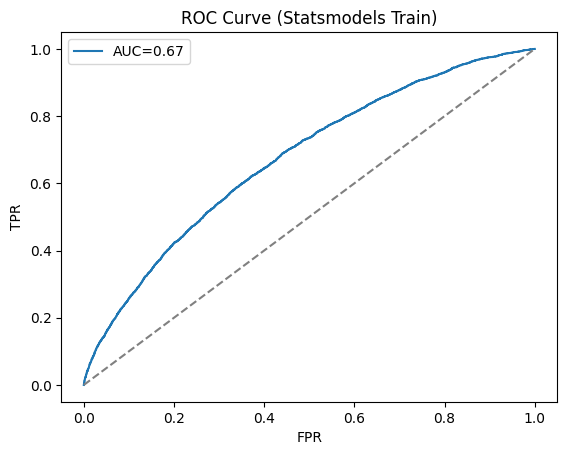

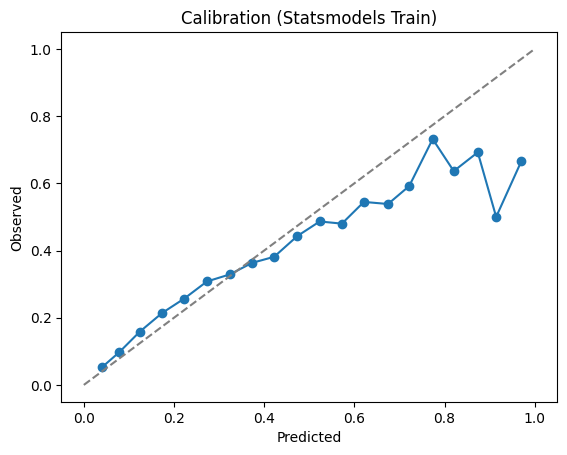

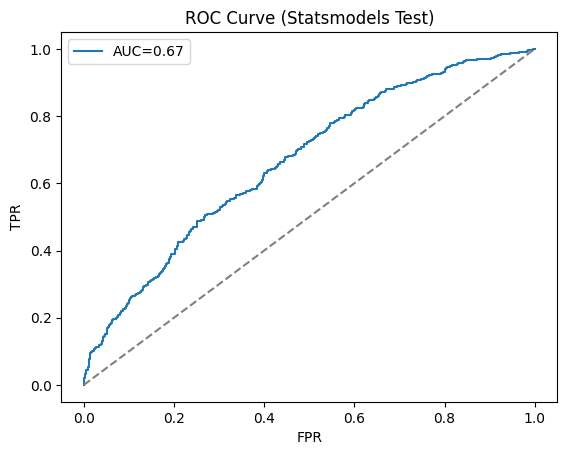

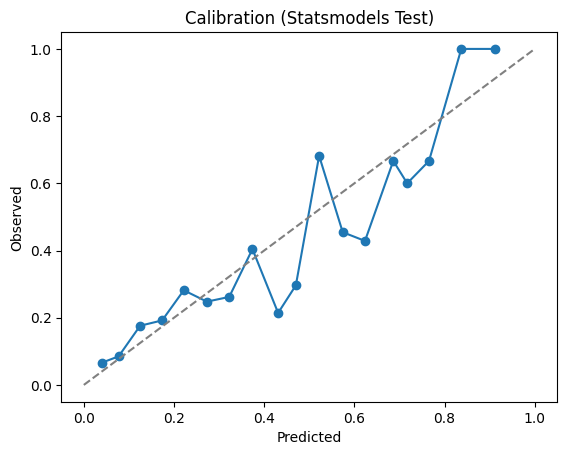


Script finished.


In [52]:
# Prepare train / test for statsmodels
X_train_proc = prep.transform(X_train[X_train["position"].isin(["FW","LW","RW"])])
X_train_sm = sm.add_constant(pd.DataFrame(X_train_proc, columns=X_train_proc.columns), prepend=True)[cols_kept]
X_test_proc = prep.transform(X_test[X_test["position"].isin(["FW","LW","RW"])])
X_test_sm = sm.add_constant(pd.DataFrame(X_test_proc, columns=X_test_proc.columns), prepend=True)[cols_kept]

y_prob_tr_sm = sm_res.predict(X_train_sm)
y_prob_te_sm = sm_res.predict(X_test_sm)

evaluate_metrics(y_train[X_train["position"].isin(["FW","LW","RW"])], y_prob_tr_sm, "Statsmodels Train")
evaluate_metrics(y_test[X_test["position"].isin(["FW","LW","RW"])], y_prob_te_sm, "Statsmodels Test")

# Optionally plots
plot_roc_and_calibration(y_train[X_train["position"].isin(["FW","LW","RW"])], y_prob_tr_sm, "(Statsmodels Train)")
plot_roc_and_calibration(y_test[X_test["position"].isin(["FW","LW","RW"])], y_prob_te_sm, "(Statsmodels Test)")

print("\nScript finished.")

In [ ]:
# ============================================================
#  Goal-Scorer Prediction – Enhanced Clean Pipeline
# ============================================================
"""
Enhanced pipeline for goal-scorer prediction with professional visualizations.

This script provides two training approaches:

1. **Scikit-learn Pipeline**
   * Minimal feature engineering (no log1p/Yeo-Johnson transformations).
   * Optional random feature dropping (BayesSearchCV optimization).
   * Standardization + LogisticRegression (L2 penalty).

2. **Statsmodels Logit Model**
   * Same preprocessing (without standardization).
   * Feature selection by p-value (configurable threshold).
   * Comprehensive evaluation: ROC-AUC, LogLoss, Brier, ECE, ROC & calibration curves.

The main execution demonstrates how to use both approaches and
compare their performance with enhanced visualizations.
"""

# ------------------------- Imports -------------------------
import warnings
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    roc_auc_score,
    log_loss,
    brier_score_loss,
    roc_curve,
    classification_report,
)
from sklearn.calibration import calibration_curve

# from skopt import BayesSearchCV
# from skopt.space import Real, Categorical, Integer

import statsmodels.api as sm
from scipy.stats import norm

warnings.filterwarnings("ignore", category=FutureWarning)

# Configure plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ===================== Feature Engineering =====================

class FeatureBuilder(BaseEstimator, TransformerMixin):
    """
    Creates basic features and cleans the DataFrame for goal-scorer prediction.
    
    This transformer performs feature engineering by creating derived features
    such as expected goals per shot and momentum indicators, while removing
    columns that are not useful for prediction.
    
    Attributes:
        drop_cols_ (list): List of columns to drop (quasi-constant features).
    """

    def __init__(self):
        """Initialize the FeatureBuilder."""
        self.drop_cols_ = []

    def fit(self, X, y=None):
        """
        Fit the transformer on training data.
        
        Args:
            X (pd.DataFrame): Input features DataFrame.
            y (pd.Series, optional): Target variable. Not used in this transformer.
            
        Returns:
            self: Returns the fitted transformer.
        """
        df = self._basic_features(X.copy())

        # Remove quasi-constant columns
        nunique_counts = df.nunique()
        self.drop_cols_ = nunique_counts[nunique_counts <= 1].index.tolist()
        return self

    def transform(self, X):
        """
        Transform the input DataFrame by applying feature engineering.
        
        Args:
            X (pd.DataFrame): Input features DataFrame.
            
        Returns:
            pd.DataFrame: Transformed DataFrame with engineered features.
        """
        df = self._basic_features(X.copy())
        df.drop(columns=self.drop_cols_, inplace=True, errors="ignore")
        df.fillna(0, inplace=True)
        return df

    @staticmethod
    def _basic_features(df):
        """
        Apply basic feature engineering transformations.
        
        Args:
            df (pd.DataFrame): Input DataFrame.
            
        Returns:
            pd.DataFrame: DataFrame with engineered features.
        """
        eps = 1e-5
        
        # Date processing
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        df["next_game_date"] = pd.to_datetime(df["next_game_date"], errors="coerce")
        df["days_until_next_game"] = (df["next_game_date"] - df["date"]).dt.days
        
        # Performance metrics
        df["xg_per_shot"] = df["avg_xg_last_3"] / (df["avg_shots_3"] + eps)
        df["momentum_xg"] = df["avg_xg_last_3"] / (df["avg_xg_last_5"] + eps)

        # Remove unnecessary columns
        columns_to_drop = [
            "date", "round", "venue", "game_started", "player_name", "league",
            'opponent_strength', 'team_offensive_strength_last_3',
            'opponent_defensive_strength_last_3', 'team_offensive_strength_last_5',
            'team_offensive_strength_last_3_next_game',
            'team_offensive_strength_last_5_next_game',
            'opponent_defensive_strength_last_3_next_game',
            'diff_efficiency_3', 'avg_shots_3', 'average_minutes_last_3', 
            'avg_xg_last_3', 'xg_efficiency_last_3', 'avg_progressive_carries_3',
            'avg_take_ons_3', 'avg_passes_completed_3', 'avg_progressive_passes_3',
            'avg_touches_3', 'efficiency_last_3', "avg_g_per_90_last_3",
            "avg_progressive_passes_5", "avg_progressive_carries_5",
            "position", "momentum_xg", "xg_efficiency_last_5",
            "strengh_diff", "avg_passes_3", "efficiency_last_5",
            "is_post_transfer_match", "passes", "avg_passes_5",                                  
            "next_game_date", "offensive_defensive_multiply_last_5_next_game",
            "game_in_season", "team_strength_next_game", 
            "offensive_defensive_multiply_last_3_next_game",
            "opponent_defensive_strength", "team_offensive_strength_next_game",
            "avg_take_ons_5", "opponent_defensive_strength_next_game",
            "opponent_elo_next_game", "team_strength_next_game", "avg_goals_last_5",
            "goals_streak_3", "avg_shots_5", "avg_shots_on_target_3",
            "team_elo_next_game", "opponent_strength_next_game",
            "strength_diff_next_game", "goals_streak_5", "avg_goals_last_3"
        ]
        
        df.drop(columns=columns_to_drop, inplace=True, errors="ignore")
        return df


class ColumnDropper(BaseEstimator, TransformerMixin):
    """
    Randomly drops a fraction of columns for robustness testing.
    
    This transformer is useful for testing model robustness to feature selection
    and can be used in hyperparameter optimization to find the optimal subset
    of features.
    
    Attributes:
        drop_frac (float): Fraction of columns to drop (0.0 to 1.0).
        random_state (int, optional): Random seed for reproducibility.
        cols_to_drop_ (list): List of column names to drop (fitted attribute).
    """

    def __init__(self, drop_frac=0.0, random_state=None):
        """
        Initialize the ColumnDropper.
        
        Args:
            drop_frac (float): Fraction of columns to randomly drop (0.0 to 1.0).
            random_state (int, optional): Random seed for reproducibility.
        """
        self.drop_frac = drop_frac
        self.random_state = random_state

    def fit(self, X, y=None):
        """
        Fit the transformer by selecting columns to drop.
        
        Args:
            X (pd.DataFrame): Input features DataFrame.
            y (pd.Series, optional): Target variable. Not used in this transformer.
            
        Returns:
            self: Returns the fitted transformer.
        """
        rng = np.random.RandomState(self.random_state)
        n_drop = int(len(X.columns) * self.drop_frac)
        self.cols_to_drop_ = (
            rng.choice(X.columns, n_drop, replace=False).tolist() if n_drop > 0 else []
        )
        return self

    def transform(self, X):
        """
        Transform the DataFrame by dropping selected columns.
        
        Args:
            X (pd.DataFrame): Input features DataFrame.
            
        Returns:
            pd.DataFrame: DataFrame with selected columns dropped.
        """
        return X.drop(columns=self.cols_to_drop_, errors="ignore")

    def get_support(self):
        """
        Get the columns that were dropped.
        
        Returns:
            list: List of dropped column names.
        """
        return self.cols_to_drop_


# ======================== Metrics Utils ========================

def expected_calibration_error(y_true, y_prob, n_bins=15):
    """
    Calculate the Expected Calibration Error (ECE).
    
    ECE measures the difference between predicted probabilities and actual
    outcomes, providing a measure of calibration quality.
    
    Args:
        y_true (array-like): True binary labels.
        y_prob (array-like): Predicted probabilities.
        n_bins (int): Number of bins for calibration calculation.
        
    Returns:
        float: Expected Calibration Error.
    """
    bins = np.linspace(0, 1, n_bins + 1)
    binids = np.digitize(y_prob, bins) - 1
    ece = 0.0
    
    for b in range(n_bins):
        mask = binids == b
        if mask.any():
            accuracy = y_true[mask].mean()
            confidence = y_prob[mask].mean()
            ece += np.abs(accuracy - confidence) * mask.mean()
    
    return ece


def evaluate_metrics(y_true, y_prob, label="", n_bins=15):
    """
    Evaluate and print comprehensive classification metrics.
    
    Args:
        y_true (array-like): True binary labels.
        y_prob (array-like): Predicted probabilities.
        label (str): Label for the evaluation (e.g., "Train", "Test").
        n_bins (int): Number of bins for ECE calculation.
        
    Returns:
        dict: Dictionary containing all computed metrics.
    """
    print(f"\n=== {label} Metrics ===")
    metrics = {
        "ROC_AUC": roc_auc_score(y_true, y_prob),
        "LogLoss": log_loss(y_true, y_prob),
        "Brier": brier_score_loss(y_true, y_prob),
        "ECE": expected_calibration_error(y_true, y_prob, n_bins),
    }
    
    for metric_name, value in metrics.items():
        print(f"{metric_name:<8}: {value:.4f}")
    
    return metrics


# ====================== Enhanced Plotting Functions =====================

def set_custom_style():
    """
    Apply custom styling for all plots to ensure professional appearance.
    """
    custom_params = {
        'figure.figsize': (10, 6),
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'axes.titleweight': 'bold',
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 11,
        'lines.linewidth': 2.5,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.grid': True,
        'figure.dpi': 100
    }
    plt.rcParams.update(custom_params)


def plot_roc_elegant(y_true, y_prob, title_suffix="", save_path=None):
    """
    Create an elegant ROC curve with enhanced styling.
    
    Args:
        y_true (array-like): True binary labels.
        y_prob (array-like): Predicted probabilities.
        title_suffix (str): Additional text for the plot title.
        save_path (str, optional): Path to save the plot.
        
    Returns:
        tuple: Figure and axes objects.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    auc_val = roc_auc_score(y_true, y_prob)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Main ROC curve
    ax.plot(fpr, tpr, linewidth=3, label=f'AUC = {auc_val:.3f}', 
            color='#2E86AB', alpha=0.9)
    
    # Reference line
    ax.plot([0, 1], [0, 1], '--', linewidth=2, 
            color='#A23B72', alpha=0.7, label='Random Classifier')
    
    # Area under curve (optional)
    ax.fill_between(fpr, tpr, alpha=0.1, color='#2E86AB')
    
    # Optimal point (Youden's index)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_fpr, optimal_tpr = fpr[optimal_idx], tpr[optimal_idx]
    ax.scatter(optimal_fpr, optimal_tpr, marker='o', s=100, 
               color='red', edgecolor='darkred', linewidth=2, 
               label=f'Optimal Point ({optimal_fpr:.2f}, {optimal_tpr:.2f})')
    
    # Styling
    ax.set_xlabel('False Positive Rate', fontsize=12, fontweight='medium')
    ax.set_ylabel('True Positive Rate', fontsize=12, fontweight='medium')
    ax.set_title(f'ROC Curve {title_suffix}', fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='lower right', fontsize=11, frameon=True, fancybox=True, shadow=True)
    ax.grid(True, alpha=0.3)
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig, ax


def plot_calibration_elegant(y_true, y_prob, title_suffix="", n_bins=15, save_path=None):
    """
    Create an elegant calibration plot with probability distribution overlay.
    
    Args:
        y_true (array-like): True binary labels.
        y_prob (array-like): Predicted probabilities.
        title_suffix (str): Additional text for the plot title.
        n_bins (int): Number of bins for calibration curve.
        save_path (str, optional): Path to save the plot.
        
    Returns:
        tuple: Figure and axes objects.
    """
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Calibration curve
    ax.plot(prob_pred, prob_true, 'o-', linewidth=3, markersize=8,
            color='#F18F01', alpha=0.9, label='Observed Calibration')
    
    # Perfect calibration line
    ax.plot([0, 1], [0, 1], '--', linewidth=2, 
            color='#C73E1D', alpha=0.7, label='Perfect Calibration')
    
    # Probability distribution histogram (background)
    ax2 = ax.twinx()
    ax2.hist(y_prob, bins=50, alpha=0.2, color='gray', density=True)
    ax2.set_ylabel('Prediction Density', fontsize=10, alpha=0.7)
    ax2.tick_params(axis='y', colors='gray', alpha=0.7)
    
    # Styling
    ax.set_xlabel('Predicted Probability', fontsize=12, fontweight='medium')
    ax.set_ylabel('Observed Probability', fontsize=12, fontweight='medium')
    ax.set_title(f'Calibration Plot {title_suffix}', fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='upper left', fontsize=11, frameon=True, fancybox=True, shadow=True)
    ax.grid(True, alpha=0.3)
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig, ax


def plot_combined_metrics(y_true, y_prob, title_suffix="", save_path=None):
    """
    Create a comprehensive dashboard combining ROC, calibration, and metrics.
    
    Args:
        y_true (array-like): True binary labels.
        y_prob (array-like): Predicted probabilities.
        title_suffix (str): Additional text for the plot title.
        save_path (str, optional): Path to save the plot.
        
    Returns:
        matplotlib.figure.Figure: The complete figure object.
    """
    fig, ((ax1, ax2)) = plt.subplots(1, 2 ,figsize=(15, 12))
    
    # 1. ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_val = roc_auc_score(y_true, y_prob)
    
    ax1.plot(fpr, tpr, linewidth=3, color='#2E86AB')
    ax1.plot([0, 1], [0, 1], '--', color='gray', alpha=0.7)
    ax1.fill_between(fpr, tpr, alpha=0.1, color='#2E86AB')
    ax1.set_title(f'ROC Curve - AUC = {auc_val:.3f}', fontweight='bold')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.grid(True, alpha=0.3)
    
    # 2. Calibration Plot
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=15)
    ax2.plot(prob_pred, prob_true, 'o-', linewidth=3, color='#F18F01')
    ax2.plot([0, 1], [0, 1], '--', color='gray', alpha=0.4)
    ax2.set_title('Calibration Plot', fontweight='bold')
    ax2.set_xlabel('Predicted Probability')
    ax2.set_ylabel('Observed Probability')
    ax2.grid(True, alpha=0.3)
    
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig


# ====================== Bayesian Optimization =====================

def bayesian_logreg_search(X, y, max_iter=20, random_state=42):
    """
    Perform Bayesian optimization for Logistic Regression pipeline.
    
    The pipeline includes: FeatureBuilder → ColumnDropper → StandardScaler → LogisticRegression.
    Optimizes regularization strength, solver, max_iter, and column dropping fraction.
    
    Args:
        X (pd.DataFrame): Training features.
        y (pd.Series): Training target variable.
        max_iter (int): Maximum number of optimization iterations.
        random_state (int): Random seed for reproducibility.
        
    Returns:
        BayesSearchCV: Fitted optimization object with best parameters.
    """
    # Create pipeline
    pipe = Pipeline([
        ("prep", FeatureBuilder()),
        ("drop", ColumnDropper()),
        ("scale", StandardScaler(with_mean=False)),
        ("clf", LogisticRegression(
            penalty="l2",
            max_iter=1000,
            n_jobs=-1,
            random_state=random_state,
        )),
    ])

    # Define search spaces
    search_spaces = {
        "drop__drop_frac": Real(0.0, 0.5),
        "clf__C": Real(1e-4, 10.0, prior="log-uniform"),
        "clf__solver": Categorical(["lbfgs", "newton-cg"]),
        "clf__max_iter": Integer(100, 1000),
    }

    # Bayesian optimization
    optimizer = BayesSearchCV(
        pipe,
        search_spaces,
        n_iter=max_iter,
        cv=StratifiedKFold(5, shuffle=True, random_state=random_state),
        scoring="roc_auc",
        n_jobs=-1,
        random_state=random_state,
        verbose=0,
    )
    
    optimizer.fit(X, y)
    return optimizer


# ====================== Statsmodels Implementation =====================

def fit_statsmodels_logit(prep, dropper, X, y, p_threshold=0.05):
    """
    Fit a Statsmodels Logit model with p-value-based feature selection.
    
    Args:
        prep (FeatureBuilder): Fitted feature preprocessing transformer.
        dropper (ColumnDropper): Fitted column dropping transformer.
        X (pd.DataFrame): Training features.
        y (pd.Series): Training target variable.
        p_threshold (float): P-value threshold for feature selection.
        
    Returns:
        tuple: (fitted_model, selected_feature_names)
    """
    # Apply preprocessing transformations
    X_processed = prep.transform(X)
    X_processed = dropper.transform(X_processed)
    X_df = pd.DataFrame(X_processed, index=y.index)
    X_df = sm.add_constant(X_df, prepend=True)

    # Initial fit with regularization
    initial_result = sm.Logit(y, X_df).fit_regularized(alpha=0.1)

    # Feature selection based on p-values
    significant_features = initial_result.pvalues <= p_threshold
    selected_columns = X_df.columns[significant_features]

    # Refit with selected features
    X_selected = X_df[selected_columns]
    final_model = sm.Logit(y, X_selected).fit(disp=0)

    # Display results summary
    results_summary = pd.DataFrame({
        "Coefficient": final_model.params,
        "Std_Error": final_model.bse,
        "z_value": final_model.tvalues,
        "P_value": final_model.pvalues,
        "Odds_Ratio": np.exp(final_model.params),
        "OR_CI_Lower": np.exp(final_model.conf_int()[0]),
        "OR_CI_Upper": np.exp(final_model.conf_int()[1]),
    })
    
    print(f"\nSelected Features (p ≤ {p_threshold}):")
    print("=" * 80)
    print(results_summary.sort_values(by="Odds_Ratio", ascending=False).round(4))

    return final_model, selected_columns



Dataset Information:
Training samples: 55,766
Validation samples: 4,850
Test samples: 4,366
Positive rate (train): 0.135

STATSMODELS LOGIT APPROACH


/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.36415474536709896
            Iterations: 228
            Function evaluations: 242
            Gradient evaluations: 228

Selected Features (p ≤ 0.01):
                                              Coefficient  Std_Error  z_value  \
scoring_rate                                       2.2016     0.1246  17.6675   
avg_xg_last_5                                      0.7893     0.1078   7.3212   
avg_shots_on_target_5                              0.2546     0.0399   6.3823   
is_home_next_game                                  0.2199     0.0259   8.4961   
offensive_defensive_multiply_next_game             0.1598     0.0151  10.5660   
opponent_defensive_strength_last_5_next_game       0.0643     0.0234   2.7481   
average_minutes_last_5                             0.0072     0.0010   6.9421   
days_until_next_game                              -0.0034     0.0006  -5.3763   
avg_passes_completed_5    

/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 11 out of 16 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


ROC_AUC : 0.7296
LogLoss : 0.3592
Brier   : 0.1074
ECE     : 0.0125


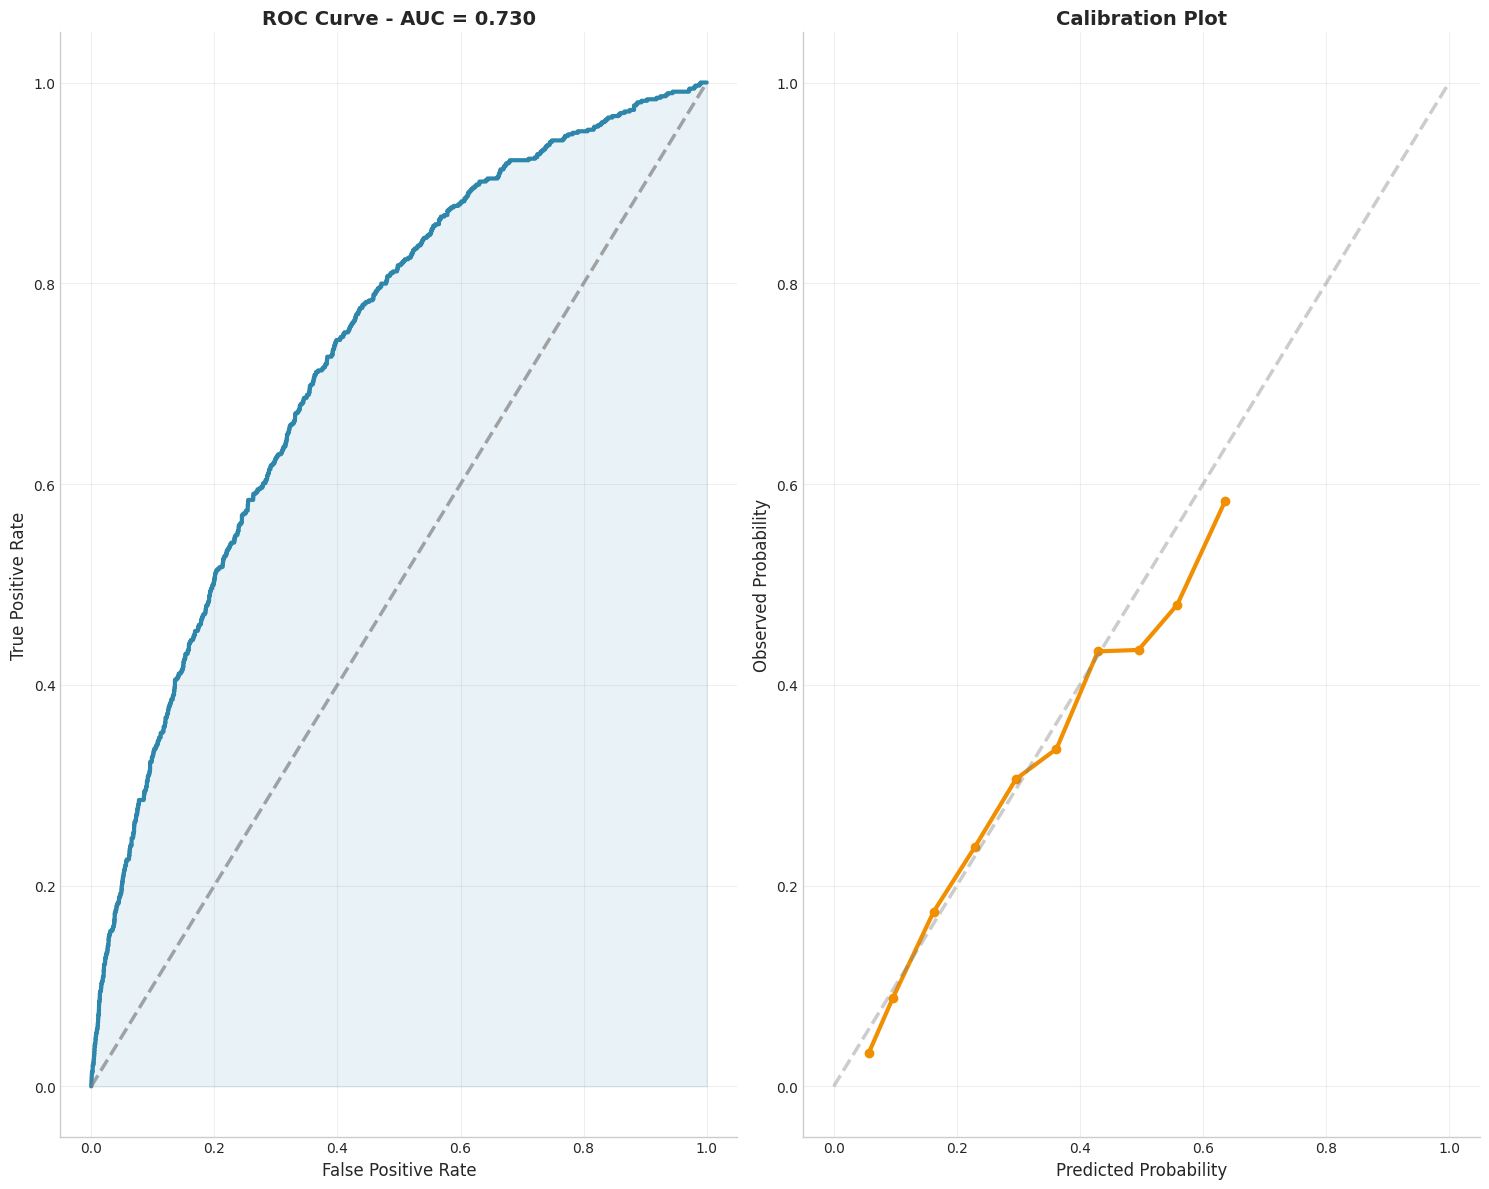


Evaluating on Test set (4,366 samples)

=== Statsmodels Test Metrics ===
ROC_AUC : 0.6737
LogLoss : 0.3704
Brier   : 0.1101
ECE     : 0.0171


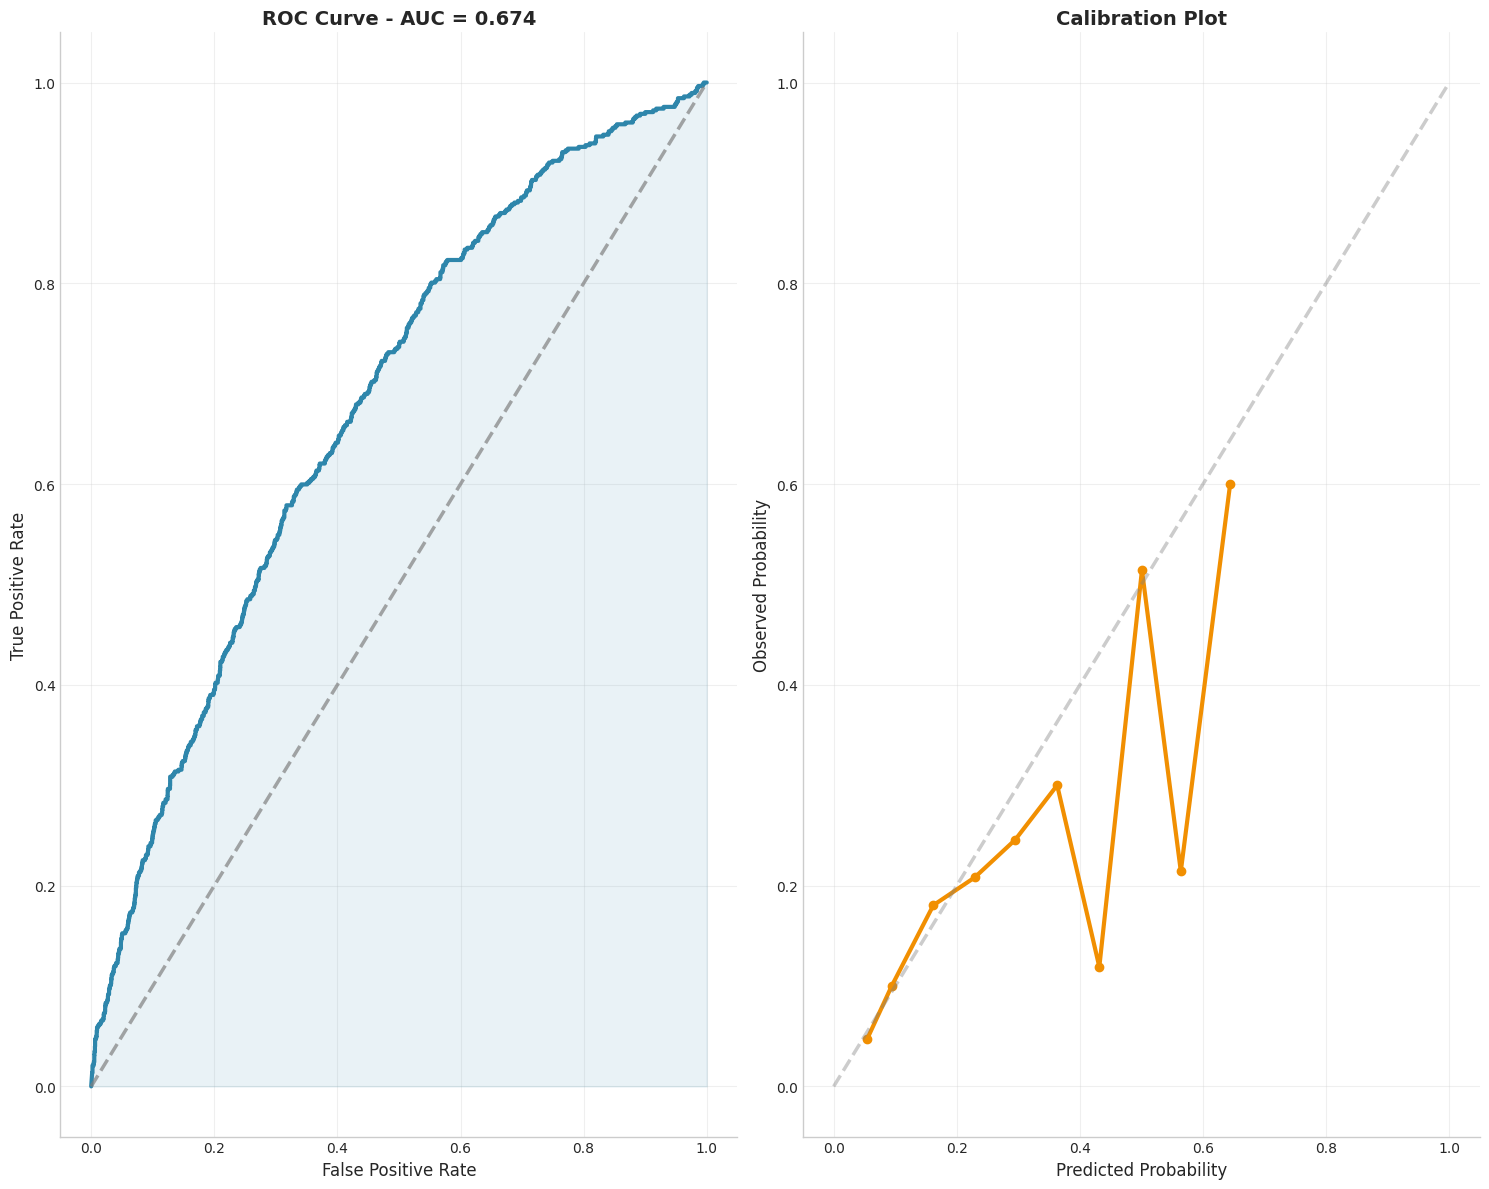


PIPELINE EXECUTION COMPLETED ✓


In [38]:

# ============================ Main Execution ============================

if __name__ == "__main__":
    # Apply custom styling
    set_custom_style()
    
    # Load and prepare data (assuming df and df_test are available)
    # Filter for started games only
    df_filtered = df[df["game_started"] == "Y"].sort_values("date")
    df_test_filtered = df_test[df_test["game_started"] == "Y"]

    # Create train/validation split
    train_mask = df_filtered["is_post_transfer_match"] == False
    X = df_filtered[train_mask].drop(columns=["target_scored_next_game"])
    y = df_filtered[train_mask]["target_scored_next_game"]

    # Split training data into train/validation
    split_index = int(0.92 * len(X))
    X_train, X_validation = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_validation = y.iloc[:split_index], y.iloc[split_index:]

    # Prepare test set
    X_test = df_test_filtered[df_test_filtered["is_post_transfer_match"]].drop(
        columns=["target_scored_next_game"]
    )
    y_test = df_test_filtered[df_test_filtered["is_post_transfer_match"]][
        "target_scored_next_game"
    ]

    print("Dataset Information:")
    print(f"Training samples: {len(X_train):,}")
    print(f"Validation samples: {len(X_validation):,}")
    print(f"Test samples: {len(X_test):,}")
    print(f"Positive rate (train): {y_train.mean():.3f}")

    # ----------- Option 1: Bayesian Optimization (Optional) -----------
    use_bayesian_optimization = False
    
    if use_bayesian_optimization:
        print("\n" + "="*60)
        print("BAYESIAN OPTIMIZATION APPROACH")
        print("="*60)
        
        optimizer = bayesian_logreg_search(X_train, y_train, max_iter=25)
        print(f"Best Cross-Validation AUC: {optimizer.best_score_:.4f}")
        print(f"Best Parameters: {optimizer.best_params_}")

        # Evaluate optimized pipeline
        evaluation_sets = [
            ("Training", X_train, y_train),
            ("No Transfer", X_validation, y_validation),
            ("After Transfer", X_test, y_test),
        ]
        
        for set_name, X_eval, y_eval in evaluation_sets:
            y_prob = optimizer.predict_proba(X_eval)[:, 1]
            evaluate_metrics(y_eval, y_prob, f"Pipeline {set_name}")
            plot_combined_metrics(y_eval, y_prob, f"Pipeline {set_name}",save_path=f"pipeline_{set_name.lower()}.png")

        # Extract fitted transformers for statsmodels
        preprocessing_pipeline = optimizer.best_estimator_.named_steps["prep"]
        column_dropper = optimizer.best_estimator_.named_steps["drop"]
    else:
        # Manual transformer initialization (skip Bayesian optimization)
        preprocessing_pipeline = FeatureBuilder().fit(X_train, y_train)
        column_dropper = ColumnDropper(drop_frac=0.0).fit(
            preprocessing_pipeline.transform(X_train), y_train
        )

    # ----------- Option 2: Statsmodels with P-value Selection -----------
    print("\n" + "="*60)
    print("STATSMODELS LOGIT APPROACH")
    print("="*60)
    
    statsmodels_logit, selected_features = fit_statsmodels_logit(
        preprocessing_pipeline, column_dropper, X_train, y_train, p_threshold=0.01
    )

    # Create prediction function for statsmodels
    def predict_with_statsmodels(X_raw):
        """
        Generate predictions using the fitted statsmodels logit model.
        
        Args:
            X_raw (pd.DataFrame): Raw input features.
            
        Returns:
            np.ndarray: Predicted probabilities.
        """
        X_processed = preprocessing_pipeline.transform(X_raw)
        X_processed = column_dropper.transform(X_processed)
        X_df = sm.add_constant(pd.DataFrame(X_processed), prepend=True)
        predictions = statsmodels_logit.predict(X_df[selected_features])
        # Apply probability ceiling for stability
        return np.minimum(predictions, 0.65)

    # Evaluate statsmodels approach
    evaluation_sets = [
        ("Validation", X_validation, y_validation),
        ("Test", X_test, y_test),
    ]
    
    for set_name, X_eval, y_eval in evaluation_sets:
        print(f"\nEvaluating on {set_name} set ({len(X_eval):,} samples)")
        y_prob = predict_with_statsmodels(X_eval)
        evaluate_metrics(y_eval, y_prob, f"Statsmodels {set_name}")
        plot_combined_metrics(y_eval, y_prob, f"Statsmodels {set_name}",save_path=f"pipeline_{set_name.lower()}.png")

    print("\n" + "="*60)
    print("PIPELINE EXECUTION COMPLETED ✓")
    print("="*60)

### final version

In [133]:
# ============================================================
#  Goal-Scorer Prediction – Enhanced Clean Pipeline
# ============================================================
"""
Enhanced pipeline for goal-scorer prediction with professional visualizations.

This script provides comprehensive model evaluation with:
- Statsmodels Logit Model with p-value feature selection
- ROC and Calibration analysis
- Position-based performance breakdown
- High scoring rate player analysis
- LaTeX table generation for scientific papers
"""

# ------------------------- Imports -------------------------
import warnings
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    roc_auc_score,
    log_loss,
    brier_score_loss,
    roc_curve,
    classification_report,
)
from sklearn.calibration import calibration_curve

import statsmodels.api as sm
from scipy.stats import norm

warnings.filterwarnings("ignore", category=FutureWarning)

# Configure plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ===================== Feature Engineering =====================
class FeatureBuilder(BaseEstimator, TransformerMixin):
    """
    Creates basic features and cleans the DataFrame for goal-scorer prediction.
    
    This transformer performs feature engineering by creating derived features
    such as expected goals per shot and momentum indicators, while removing
    columns that are not useful for prediction.
    
    Attributes:
        drop_cols_ (list): List of columns to drop (quasi-constant features).
    """

    def __init__(self):
        """Initialize the FeatureBuilder."""
        self.drop_cols_ = []

    def fit(self, X, y=None):
        """
        Fit the transformer on training data.
        
        Args:
            X (pd.DataFrame): Input features DataFrame.
            y (pd.Series, optional): Target variable. Not used in this transformer.
            
        Returns:
            self: Returns the fitted transformer.
        """
        df = self._basic_features(X.copy())

        # Remove quasi-constant columns
        nunique_counts = df.nunique()
        self.drop_cols_ = nunique_counts[nunique_counts <= 1].index.tolist()
        return self

    def transform(self, X):
        """
        Transform the input DataFrame by applying feature engineering.
        
        Args:
            X (pd.DataFrame): Input features DataFrame.
            
        Returns:
            pd.DataFrame: Transformed DataFrame with engineered features.
        """
        df = self._basic_features(X.copy())
        df.drop(columns=self.drop_cols_, inplace=True, errors="ignore")
        df.fillna(0, inplace=True)
        return df

    @staticmethod
    def _basic_features(df):
        """
        Apply basic feature engineering transformations.
        
        Args:
            df (pd.DataFrame): Input DataFrame.
            
        Returns:
            pd.DataFrame: DataFrame with engineered features.
        """
        eps = 1e-5
        
        # Date processing
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        df["next_game_date"] = pd.to_datetime(df["next_game_date"], errors="coerce")
        df["days_until_next_game"] = (df["next_game_date"] - df["date"]).dt.days
        
        # Performance metrics
        df["xg_per_shot"] = df["avg_xg_last_3"] / (df["avg_shots_3"] + eps)
        df["momentum_xg"] = df["avg_xg_last_3"] / (df["avg_xg_last_5"] + eps)

        # Remove unnecessary columns
        columns_to_drop = [
            "date", "round", "venue", "game_started", "player_name", "league",
            'opponent_strength', 'team_offensive_strength_last_3',
            'opponent_defensive_strength_last_3', 'team_offensive_strength_last_5',
            'team_offensive_strength_last_3_next_game',
            'team_offensive_strength_last_5_next_game',
            'opponent_defensive_strength_last_3_next_game',
            'diff_efficiency_3', 'avg_shots_3', 'average_minutes_last_3', 
            'avg_xg_last_3', 'xg_efficiency_last_3', 'avg_progressive_carries_3',
            'avg_take_ons_3', 'avg_passes_completed_3', 'avg_progressive_passes_3',
            'avg_touches_3', 'efficiency_last_3', "avg_g_per_90_last_3",
            "avg_progressive_passes_5", "avg_progressive_carries_5",
            "position", "momentum_xg", "xg_efficiency_last_5",
            "strengh_diff", "avg_passes_3", "efficiency_last_5",
            "is_post_transfer_match", "passes", "avg_passes_5",                                  
            "next_game_date", "offensive_defensive_multiply_last_5_next_game",
            "game_in_season", "team_strength_next_game", 
            "offensive_defensive_multiply_last_3_next_game",
            "opponent_defensive_strength", "team_offensive_strength_next_game",
            "avg_take_ons_5", "opponent_defensive_strength_next_game",
            "opponent_elo_next_game", "team_strength_next_game", "avg_goals_last_5",
            "goals_streak_3", "avg_shots_5", "avg_shots_on_target_3",
            "team_elo_next_game", "opponent_strength_next_game",
            "strength_diff_next_game", "goals_streak_5", "avg_goals_last_3",'next_game_odds_price_betmgm',
			'next_game_odds_price_betrivers', 'next_game_odds_price_bovada',
			'next_game_odds_price_draftkings', 'next_game_odds_price_fanduel','opponent_defensive_strength_last_5',"avg_touches_5"
        ]
        
        df.drop(columns=columns_to_drop, inplace=True, errors="ignore")
      
        return df


class ColumnDropper(BaseEstimator, TransformerMixin):
    """
    Randomly drops a fraction of columns for robustness testing.
    
    This transformer is useful for testing model robustness to feature selection
    and can be used in hyperparameter optimization to find the optimal subset
    of features.
    
    Attributes:
        drop_frac (float): Fraction of columns to drop (0.0 to 1.0).
        random_state (int, optional): Random seed for reproducibility.
        cols_to_drop_ (list): List of column names to drop (fitted attribute).
    """

    def __init__(self, drop_frac=0.0, random_state=None):
        """
        Initialize the ColumnDropper.
        
        Args:
            drop_frac (float): Fraction of columns to randomly drop (0.0 to 1.0).
            random_state (int, optional): Random seed for reproducibility.
        """
        self.drop_frac = drop_frac
        self.random_state = random_state

    def fit(self, X, y=None):
        """
        Fit the transformer by selecting columns to drop.
        
        Args:
            X (pd.DataFrame): Input features DataFrame.
            y (pd.Series, optional): Target variable. Not used in this transformer.
            
        Returns:
            self: Returns the fitted transformer.
        """
        rng = np.random.RandomState(self.random_state)
        n_drop = int(len(X.columns) * self.drop_frac)
        self.cols_to_drop_ = (
            rng.choice(X.columns, n_drop, replace=False).tolist() if n_drop > 0 else []
        )
        return self

    def transform(self, X):
        """
        Transform the DataFrame by dropping selected columns.
        
        Args:
            X (pd.DataFrame): Input features DataFrame.
            
        Returns:
            pd.DataFrame: DataFrame with selected columns dropped.
        """
        return X.drop(columns=self.cols_to_drop_, errors="ignore")

    def get_support(self):
        """
        Get the columns that were dropped.
        
        Returns:
            list: List of dropped column names.
        """
        return self.cols_to_drop_




# ======================== Metrics Utils ========================

def expected_calibration_error(y_true, y_prob, n_bins: int = 15):
    
    y_true = np.asarray(y_true, dtype=np.float64)
    y_prob = np.asarray(y_prob, dtype=np.float64)
    N = y_true.size
    if N == 0:
        return np.nan

    # 1. On trie les prédictions croissantes
    order = np.argsort(y_prob)
    y_true_sorted = y_true[order]
    y_prob_sorted = y_prob[order]

    # 2. Taille cible d’un bin (≈ effectif constant)
    bin_size = int(np.ceil(N / n_bins))
    
    ece = 0.0
    # 3. On balaye par paquets de bin_size
    for start in range(0, N, bin_size):
        end = min(start + bin_size, N)
        y_t_bin = y_true_sorted[start:end]
        y_p_bin = y_prob_sorted[start:end]
        if y_t_bin.size == 0:       # sécurité
            continue
        
        acc = y_t_bin.mean()        # fréquence observée
        conf = y_p_bin.mean()       # confiance moyenne
        ece += np.abs(acc - conf) * (y_t_bin.size / N)

    return ece


def compute_metrics(y_true, y_prob):
    """Compute all evaluation metrics."""
    return {
        "AUC": roc_auc_score(y_true, y_prob),
        "Brier": brier_score_loss(y_true, y_prob),
        "ECE": expected_calibration_error(y_true, y_prob),
        "LogLoss": log_loss(y_true, y_prob),
        "N_Players": len(y_true),
        "Sum True": y_true.sum(),
    }


# ====================== Plotting Functions =====================

def set_custom_style():
    """Apply custom styling for professional plots."""
    custom_params = {
        'figure.figsize': (12, 5),
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'axes.titleweight': 'bold',
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 11,
        'lines.linewidth': 2.5,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.grid': True,
        'figure.dpi': 100
    }
    plt.rcParams.update(custom_params)


def create_roc_calibration_plots(results_dict, save_path="model_evaluation"):
    """Create ROC and Calibration plots side by side."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Model Performance Evaluation', fontsize=16, fontweight='bold')
    
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
    
    # 1. ROC Curves
    for i, (name, data) in enumerate(results_dict.items()):
        y_true, y_prob = data['y_true'], data['y_prob']
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        roc_auc = roc_auc_score(y_true, y_prob)
        ax1.plot(fpr, tpr, color=colors[i], lw=2.5,
                label=f'{name} (AUC: {roc_auc:.3f})')
    
    ax1.plot([0, 1], [0, 1], 'k--', alpha=0.6)
    ax1.set_xlabel('False Positive Rate', fontweight='bold')
    ax1.set_ylabel('True Positive Rate', fontweight='bold')
    ax1.set_title('ROC Curves', fontweight='bold')
    ax1.legend(frameon=True, fancybox=True, shadow=True)
    ax1.grid(True, alpha=0.3)
    
    # 2. Calibration Plot
    ax2.plot([0, 1], [0, 1], 'k--', alpha=0.6, label='Perfect calibration')
    
    for i, (name, data) in enumerate(results_dict.items()):
        y_true, y_prob = data['y_true'], data['y_prob']
        fraction_pos, mean_pred = calibration_curve(y_true, y_prob,n_bins=10)
        brier = brier_score_loss(y_true, y_prob)
        ax2.plot(mean_pred, fraction_pos, 's-', color=colors[i], 
                label=f'{name} (Brier score: {brier:.3f})')
    
    ax2.set_xlabel('Mean Predicted Probability', fontweight='bold')
    ax2.set_ylabel('Fraction of Positives', fontweight='bold')
    ax2.set_title('Calibration Plot', fontweight='bold')
    ax2.legend(frameon=True, fancybox=True, shadow=True)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=300, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    plt.show()


# ====================== Analysis Functions =====================

def analyze_by_position(X_data, y_true, y_prob, set_name):
    """Analyze performance by player position."""
    if 'position' not in X_data.columns:
        print(f"Warning: 'position' column not found in {set_name} data")
        return pd.DataFrame()
    
    results = []
    for position in X_data['position'].unique():
        if pd.isna(position):
            continue
        
        mask = X_data['position'] == position
        if mask.sum() < 10:  # Skip positions with too few samples
            continue
            
        pos_y_true = y_true[mask]
        pos_y_prob = y_prob[mask]
        
        metrics = compute_metrics(pos_y_true, pos_y_prob)
        metrics['Position'] = position
        metrics['Dataset'] = set_name
        results.append(metrics)
    
    return pd.DataFrame(results)


def analyze_high_scorers(y_true, y_prob, X_eval, scoring_threshold=0.3, set_name=""):
    """Analyze performance for high-scoring probability players."""
    
    high_scorer_mask = X_eval["scoring_rate"] >= scoring_threshold
    
    if high_scorer_mask.sum() == 0:
        return {
            'Dataset': set_name,
            'Threshold': scoring_threshold,
            'AUC': np.nan,
            'Brier': np.nan,
            'ECE': np.nan,
            'LogLoss': np.nan,
            'N_Players': 0
        }
    
    high_y_true = y_true[high_scorer_mask]
    high_y_prob = y_prob[high_scorer_mask]
    
    metrics = compute_metrics(high_y_true, high_y_prob)
    metrics['Dataset'] = set_name
    metrics['Threshold'] = scoring_threshold
    
    return metrics


# ====================== LaTeX Table Generation =====================

def create_performance_latex_table(results_dict, save_path="performance_table"):
    """Create comprehensive performance table in LaTeX format."""
    metrics_data = []
    
    for name, data in results_dict.items():
        y_true, y_prob = data['y_true'], data['y_prob']
        metrics = compute_metrics(y_true, y_prob)
        metrics['Dataset'] = name
        metrics_data.append(metrics)
    
    df_metrics = pd.DataFrame(metrics_data)
    
    latex_table = """\\begin{table}[htbp]
\\centering
\\caption{Overall Model Performance Metrics}
\\label{tab:overall_performance}
\\begin{tabular}{|l|c|c|c|c|c|}
\\hline
\\textbf{Dataset} & \\textbf{AUC-ROC} & \\textbf{Brier Score} & \\textbf{ECE} & \\textbf{Log Loss} & \\textbf{N Players} \\\\
\\hline
"""
    
    for _, row in df_metrics.iterrows():
        latex_table += f"{row['Dataset']} & {row['AUC']:.4f} & {row['Brier']:.4f} & {row['ECE']:.4f} & {row['LogLoss']:.4f} & {row['N_Players']:,} \\\\\n"
    
    latex_table += """\\hline
\\end{tabular}
\\end{table}

"""
    
    with open(f"{save_path}.tex", "w") as f:
        f.write(latex_table)
    
    return df_metrics


def create_position_latex_table(position_results, save_path="position_performance"):
    """Create position-based performance table in LaTeX format."""
    if position_results.empty:
        print("No position data available for LaTeX table generation")
        return
    
    latex_table = """\\begin{table}[htbp]
\\centering
\\caption{Performance Metrics by Player Position}
\\label{tab:position_performance}
\\resizebox{\\textwidth}{!}{%
\\begin{tabular}{|l|l|c|c|c|c|c|}
\\hline
\\textbf{Position} & \\textbf{Dataset} & \\textbf{AUC-ROC} & \\textbf{Brier Score} & \\textbf{ECE} & \\textbf{Log Loss} & \\textbf{N Players} \\\\
\\hline
"""
    
    for _, row in position_results.iterrows():
        pos = row['Position'].replace('_', '\\_')
        latex_table += f"{pos} & {row['Dataset']} & {row['AUC']:.4f} & {row['Brier']:.4f} & {row['ECE']:.4f} & {row['LogLoss']:.4f} & {row['Sum True']:.0f} & {row['N_Players']:,} \\\\\n"
    
    latex_table += """\\hline
\\end{tabular}%
}
\\end{table}

"""
    
    with open(f"{save_path}.tex", "w") as f:
        f.write(latex_table)
    
    print(f"Position performance table saved to {save_path}.tex")


def create_high_scorers_latex_table(high_scorer_results, save_path="high_scorers_performance"):
    """Create high scorers performance table in LaTeX format."""
    df_high_scorers = pd.DataFrame(high_scorer_results)
    
    latex_table = """\\begin{table}[htbp]
\\centering
\\caption{Performance Metrics for High Scoring Rate Players}
\\label{tab:high_scorers_performance}
\\begin{tabular}{|l|c|c|c|c|c|c|}
\\hline
\\textbf{Dataset} & \\textbf{Threshold} & \\textbf{AUC-ROC} & \\textbf{Brier Score} & \\textbf{ECE} & \\textbf{Log Loss} & \\textbf{N Players} \\\\
\\hline
"""
    
    for _, row in df_high_scorers.iterrows():
        auc_str = f"{row['AUC']:.4f}" if not pd.isna(row['AUC']) else "N/A"
        brier_str = f"{row['Brier']:.4f}" if not pd.isna(row['Brier']) else "N/A"
        ece_str = f"{row['ECE']:.4f}" if not pd.isna(row['ECE']) else "N/A"
        logloss_str = f"{row['LogLoss']:.4f}" if not pd.isna(row['LogLoss']) else "N/A"
        
        latex_table += f"{row['Dataset']} & {row['Threshold']:.1f} & {auc_str} & {brier_str} & {ece_str} & {logloss_str} & {row['N_Players']:,} \\\\\n"
    
    latex_table += """\\hline
\\end{tabular}
\\end{table}

"""
    
    with open(f"{save_path}.tex", "w") as f:
        f.write(latex_table)
    
    print(f"High scorers performance table saved to {save_path}.tex")


# ====================== Statsmodels Implementation =====================

def fit_statsmodels_logit(prep, dropper, X, y, p_threshold=0.05):
    """Fit a Statsmodels Logit model with p-value-based feature selection."""
    X_processed = prep.transform(X)
    X_processed = dropper.transform(X_processed)
    X_df = pd.DataFrame(X_processed, index=y.index)
    X_df = sm.add_constant(X_df, prepend=True)

    # Initial fit with regularization
    initial_result = sm.Logit(y, X_df).fit_regularized(alpha=0.1)

    # Feature selection based on p-values
    significant_features = initial_result.pvalues <= p_threshold
    selected_columns = X_df.columns[significant_features]

    # Refit with selected features
    X_selected = X_df[selected_columns]
    final_model = sm.Logit(y, X_selected).fit(disp=0)

    # Display results summary
    results_summary = pd.DataFrame({
        "Coefficient": final_model.params,
        "Std_Error": final_model.bse,
        "z_value": final_model.tvalues,
        "P_value": final_model.pvalues,
        "Odds_Ratio": np.exp(final_model.params),
        "OR_CI_Lower": np.exp(final_model.conf_int()[0]),
        "OR_CI_Upper": np.exp(final_model.conf_int()[1]),
    })
    
    print(f"\nSelected Features (p ≤ {p_threshold}):")
    print("=" * 80)
    print(results_summary.sort_values(by="Odds_Ratio", ascending=False).round(4))

    return final_model, selected_columns


def create_statsmodels_latex_table(statsmodels_logit, save_path="statsmodels_results"):
    """Create LaTeX table for statsmodels results."""
    coef_table = statsmodels_logit.summary2().tables[1]
    
    latex_table = """\\begin{table}[htbp]
\\centering
\\caption{Logistic Regression Results (Statsmodels)}
\\label{tab:logit_results}
\\resizebox{\\textwidth}{!}{%
\\begin{tabular}{|l|c|c|c|c|c|c|}
\\hline
\\textbf{Variable} & \\textbf{Coefficient} & \\textbf{Std Error} & \\textbf{z-value} & \\textbf{P>|z|} & \\textbf{[0.025} & \\textbf{0.975]} \\\\
\\hline
"""
    
    for idx, row in coef_table.iterrows():
        variable = idx.replace('_', '\\_')
        coef = f"{row['Coef.']:.4f}"
        stderr = f"{row['Std.Err.']:.4f}"
        z_val = f"{row['z']:.3f}"
        p_val = f"{row['P>|z|']:.4f}" if row['P>|z|'] >= 0.001 else "< 0.001"
        ci_low = f"{row['[0.025']:.4f}"
        ci_high = f"{row['0.975]']:.4f}"
        
        if row['P>|z|'] < 0.001:
            coef = f"\\textbf{{{coef}}}***"
        elif row['P>|z|'] < 0.01:
            coef = f"\\textbf{{{coef}}}**"
        elif row['P>|z|'] < 0.05:
            coef = f"\\textbf{{{coef}}}*"
        
        latex_table += f"{variable} & {coef} & {stderr} & {z_val} & {p_val} & {ci_low} & {ci_high} \\\\\n"
    
    latex_table += """\\hline
\\end{tabular}%
}
\\begin{tablenotes}
\\small
\\item Note: *** p<0.001, ** p<0.01, * p<0.05
"""
    
    try:
        latex_table += f"""\\item Log-Likelihood: {statsmodels_logit.llf:.4f}
\\item AIC: {statsmodels_logit.aic:.4f}
\\item BIC: {statsmodels_logit.bic:.4f}
\\item Pseudo R²: {statsmodels_logit.prsquared:.4f}
\\item Number of observations: {int(statsmodels_logit.nobs)}
"""
    except:
        pass
    
    latex_table += """\\end{tablenotes}
\\end{table}

"""
    
    with open(f"{save_path}.tex", "w") as f:
        f.write(latex_table)
    
    print(f"Statsmodels results table saved to {save_path}.tex")



Dataset Information:
Training samples: 53,340
Validation samples: 4,639
Test samples: 6,744
Positive rate (train): 0.135

STATSMODELS LOGIT APPROACH


/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.36470983793381584
            Iterations: 196
            Function evaluations: 209
            Gradient evaluations: 196

Selected Features (p ≤ 0.02):
                                              Coefficient  Std_Error  z_value  \
scoring_rate                                       2.2576     0.1277  17.6757   
avg_xg_last_5                                      0.7435     0.1103   6.7418   
avg_shots_on_target_5                              0.2576     0.0407   6.3248   
is_home_next_game                                  0.2142     0.0264   8.1005   
offensive_defensive_multiply_next_game             0.1591     0.0155  10.2434   
opponent_defensive_strength_last_5_next_game       0.0577     0.0239   2.4147   
average_minutes_last_5                             0.0071     0.0011   6.6637   
days_until_next_game                              -0.0034     0.0006  -5.2581   
avg_passes_completed_5    

/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 9 out of 14 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


AUC-ROC: 0.7325
ECE: 0.0182

Evaluating on After Transfer set (6,744 samples)
AUC-ROC: 0.6868
ECE: 0.0237

GENERATING SCIENTIFIC OUTPUTS


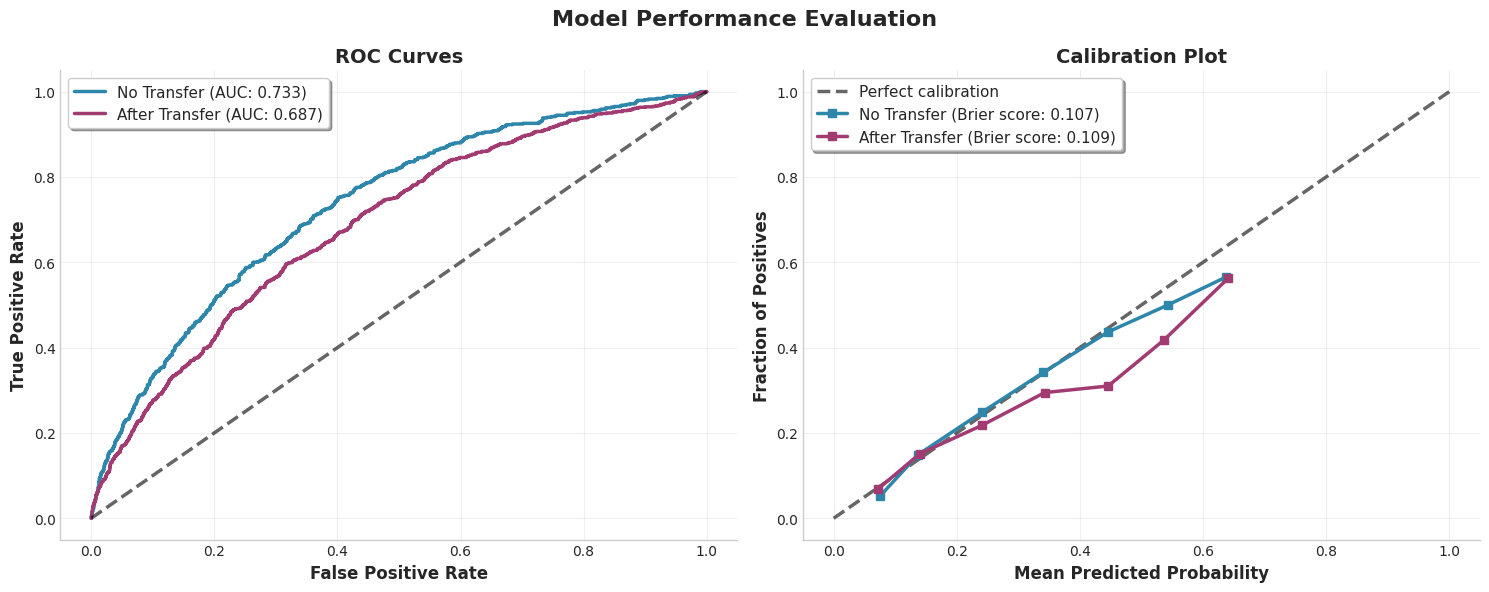


Overall Performance:
     AUC    Brier      ECE  LogLoss  N_Players  Sum True        Dataset
0.732518 0.107429 0.018192 0.359058       4639       633    No Transfer
0.686787 0.109491 0.023698 0.368130       6744       900 After Transfer
Position performance table saved to final_position_performance_table.tex

Position-based Performance:
     AUC    Brier      ECE  LogLoss  N_Players  Sum True Position        Dataset
0.646730 0.043816 0.046391 0.188072        657        30       DM    No Transfer
0.643467 0.131953 0.054409 0.431042        470        81       RW    No Transfer
0.612994 0.120421 0.068521 0.401110        423        60       LW    No Transfer
0.657197 0.185132 0.048222 0.553458        995       263       FW    No Transfer
0.670556 0.108181 0.051443 0.366491        627        81       AM    No Transfer
0.635150 0.050444 0.034846 0.209232        953        50       CM    No Transfer
0.656837 0.118348 0.069171 0.394210        262        38       LM    No Transfer
0.739339 0.1

In [134]:

# ============================ Main Execution ============================

if __name__ == "__main__":
    # Apply custom styling
    set_custom_style()
    df = pd.read_csv("df_cleaned.csv")  # Load your training data
    df_test = pd.read_csv("df_test_cleaned.csv")
    # Load and prepare data (assuming df and df_test are available)
    df_filtered = df[df["game_started"] == "Y"].sort_values("date")
    df_test_filtered = df_test[df_test["game_started"] == "Y"]

    # Create train/validation split
    train_mask = df_filtered["is_post_transfer_match"] == False
    X = df_filtered[train_mask].drop(columns=["target_scored_next_game"])
    y = df_filtered[train_mask]["target_scored_next_game"]

    # Split training data into train/validation
    split_index = int(0.92 * len(X))
    X_train, X_validation = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_validation = y.iloc[:split_index], y.iloc[split_index:]

    # Prepare test set
    X_test = df_test_filtered[df_test_filtered["is_post_transfer_match"]].drop(
        columns=["target_scored_next_game"]
    )
    y_test = df_test_filtered[df_test_filtered["is_post_transfer_match"]][
        "target_scored_next_game"
    ]

    print("Dataset Information:")
    print(f"Training samples: {len(X_train):,}")
    print(f"Validation samples: {len(X_validation):,}")
    print(f"Test samples: {len(X_test):,}")
    print(f"Positive rate (train): {y_train.mean():.3f}")

    # Initialize transformers
    preprocessing_pipeline = FeatureBuilder().fit(X_train, y_train)
    column_dropper = ColumnDropper(drop_frac=0.0).fit(
        preprocessing_pipeline.transform(X_train), y_train
    )

    # Fit Statsmodels Logit
    print("\n" + "="*60)
    print("STATSMODELS LOGIT APPROACH")
    print("="*60)
    
    statsmodels_logit, selected_features = fit_statsmodels_logit(
        preprocessing_pipeline, column_dropper, X_train, y_train, p_threshold=0.02
    )

    # Create prediction function
    def predict_with_statsmodels(X_raw):
        X_processed = preprocessing_pipeline.transform(X_raw)
        X_processed = column_dropper.transform(X_processed)
        X_df = sm.add_constant(pd.DataFrame(X_processed), prepend=True)
        predictions = statsmodels_logit.predict(X_df[selected_features])
        return np.minimum(predictions, 0.65)

    # Collect results for visualization
    results_dict = {}
    all_position_results = []
    high_scorer_results = []
    
    # Predictions on validation and test sets
    for set_name, X_eval, y_eval in [("No Transfer", X_validation, y_validation), 
                                     ("After Transfer", X_test, y_test)]:
        print(f"\nEvaluating on {set_name} set ({len(X_eval):,} samples)")
        y_prob = predict_with_statsmodels(X_eval)
        results_dict[set_name] = {'y_true': y_eval, 'y_prob': y_prob}
        # Overall metrics
        overall_metrics = compute_metrics(y_eval, y_prob)
        print(f"AUC-ROC: {overall_metrics['AUC']:.4f}")
        print(f"ECE: {overall_metrics['ECE']:.4f}")
        
        # Position-based analysis
        position_df = analyze_by_position(X_eval, y_eval, y_prob, set_name)
        if not position_df.empty:
            all_position_results.append(position_df)
        
        # High scorers analysis
        high_scorer_metrics = analyze_high_scorers(y_eval, y_prob, X_eval,
                                                  scoring_threshold=0.25, 
                                                  set_name=set_name)
        high_scorer_results.append(high_scorer_metrics)

    # Generate outputs
    print("\n" + "="*60)
    print("GENERATING SCIENTIFIC OUTPUTS")
    print("="*60)
    
    # Create plots
    create_roc_calibration_plots(results_dict, save_path="final_model_evaluation_roc_calibration")
    
    # Create LaTeX tables
    performance_df = create_performance_latex_table(results_dict, save_path="final_overall_performance_table")
    print("\nOverall Performance:")
    print(performance_df.to_string(index=False))
    
    # Position-based performance table
    if all_position_results:
        combined_position_results = pd.concat(all_position_results, ignore_index=True)
        create_position_latex_table(combined_position_results, save_path="final_position_performance_table")
        print("\nPosition-based Performance:")
        print(combined_position_results.to_string(index=False))
    
    # High scorers performance table
    create_high_scorers_latex_table(high_scorer_results, save_path="final_high_scorers_performance_table")
    print("\nHigh Scorers Performance:")
    for result in high_scorer_results:
        print(f"{result['Dataset']}: AUC={result['AUC']:.4f}, N={result['N_Players']}")
    
    # Statsmodels table
    create_statsmodels_latex_table(statsmodels_logit, save_path="final_statsmodels_regression_results")

    print("\n" + "="*60)
    print("ENHANCED PIPELINE EXECUTION COMPLETED ✓")
    print("Outputs saved:")
    print("- ROC and Calibration plots (PNG)")
    print("- Overall performance table (LaTeX)")
    print("- Position-based performance table (LaTeX)")
    print("- High scorers performance table (LaTeX)")
    print("- Statsmodels regression results (LaTeX)")
    print("="*60)

In [58]:
X_mean=X_validation[["next_game_odds_price_betmgm",
    "next_game_odds_price_betrivers",
    "next_game_odds_price_bovada",
    "next_game_odds_price_draftkings",
    "next_game_odds_price_fanduel"]].mean(axis=1)
X_validation["mean_book"]=X_mean
X_validation['prob_book']=1/(X_mean)
X_validation["my_score"]=predict_with_statsmodels(X_validation)
odds_dispo = X_validation.loc[X_validation["mean_book"]!=1,"prob_book"]
my_odds = X_validation.loc[X_validation["mean_book"]!=1,"my_score"]
target_dispo = y_validation[odds_dispo.index]
print(odds_dispo.describe())
compute_metrics(target_dispo,np.round(odds_dispo,3))
calibration_curve(target_dispo,np.round(odds_dispo,3))

count    1930.000000
mean        0.198865
std         0.109333
min         0.029586
25%         0.115691
50%         0.173913
75%         0.262081
max         0.766284
Name: prob_book, dtype: float64


/tmp/ipykernel_159693/158153304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation["mean_book"]=X_mean
/tmp/ipykernel_159693/158153304.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation['prob_book']=1/(X_mean)
/tmp/ipykernel_159693/158153304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

(array([0.06785714, 0.21866295, 0.4625    , 0.75      ]),
 array([0.12437232, 0.27754039, 0.46525   , 0.66866667]))

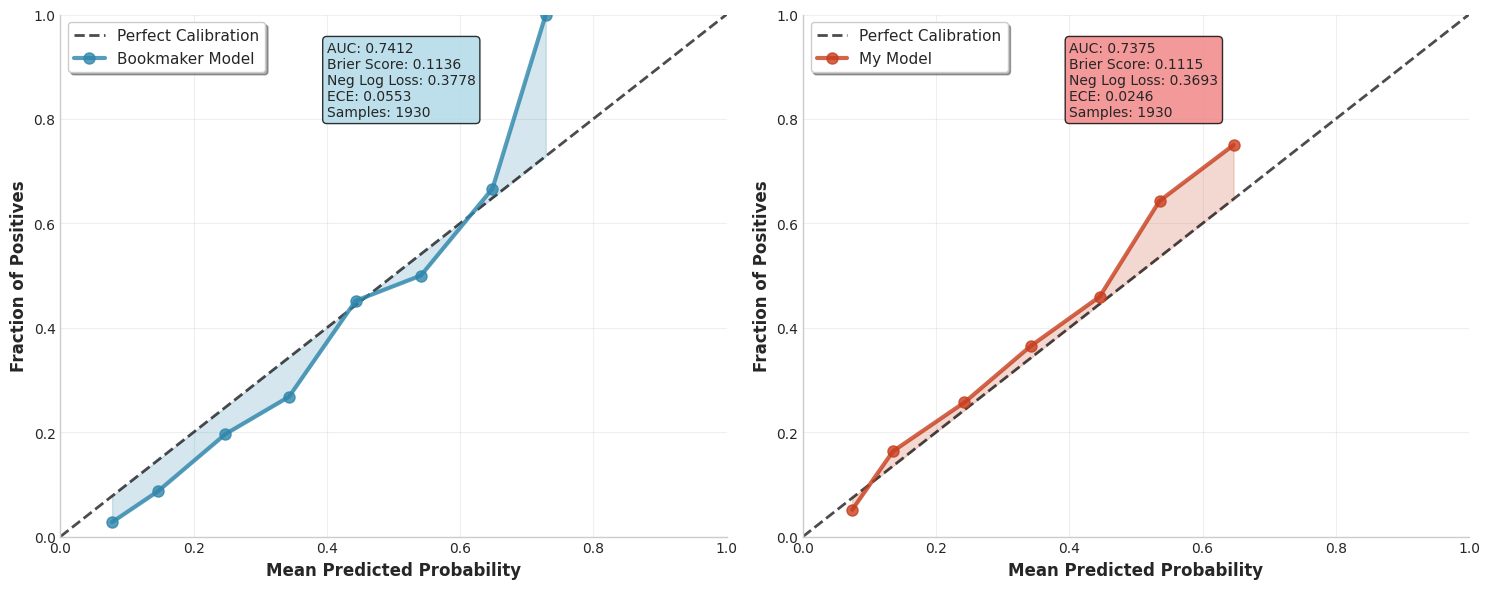

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.calibration import calibration_curve
import seaborn as sns

def create_beautiful_calibration_plot(y_true, y_prob_book, y_prob_my, n_bins=10, title=None):
    """
    Create a beautiful calibration plot comparing two models.
    
    Parameters:
    - y_true: true binary labels
    - y_prob_book: predicted probabilities from bookmaker model
    - y_prob_my: predicted probabilities from my model
    - n_bins: number of bins for calibration curve
    - title: optional title for the plot
    """
    
    # Set the style
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("husl")
    
    # Create figure with higher DPI for better quality
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=100)
    
    # Calculate calibration curves for both models
    fraction_of_positives_book, mean_predicted_value_book = calibration_curve(
        y_true, y_prob_book, n_bins=n_bins
    )
    fraction_of_positives_my, mean_predicted_value_my = calibration_curve(
        y_true, y_prob_my, n_bins=n_bins
    )
    
    # Plot 1: Bookmaker Calibration curve
    ax1.plot([0, 1], [0, 1], 'k--', alpha=0.7, linewidth=2, label='Perfect Calibration')
    ax1.plot(mean_predicted_value_book, fraction_of_positives_book, 'o-', 
             linewidth=3, markersize=8, alpha=0.8, 
             color='#2E86AB', label='Bookmaker Model')
    
    # Fill area between perfect and actual calibration
    ax1.fill_between(mean_predicted_value_book, fraction_of_positives_book, 
                     mean_predicted_value_book, alpha=0.2, color='#2E86AB')
    
    ax1.set_xlabel('Mean Predicted Probability', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Fraction of Positives', fontsize=12, fontweight='bold')
    ax1.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim([0, 1])
    ax1.set_ylim([0, 1])
    
    # Add text box with calibration metrics for bookmaker
    from sklearn.metrics import brier_score_loss, roc_auc_score, log_loss
    brier_score_book = brier_score_loss(y_true, y_prob_book)
    auc_book = roc_auc_score(y_true, y_prob_book)
    neg_log_loss_book = log_loss(y_true, y_prob_book)
    
    # Calculate ECE (using the function from earlier)
    def calculate_ece(y_true, y_prob, n_bins=10):
        bins = np.linspace(0, 1, n_bins + 1)
        binids = np.digitize(y_prob, bins) - 1
        ece = 0.0
        for b in range(n_bins):
            mask = binids == b
            if mask.any():
                accuracy = y_true[mask].mean()
                confidence = y_prob[mask].mean()
                ece += np.abs(accuracy - confidence) * mask.mean()
        return ece
    
    ece_book = calculate_ece(y_true, y_prob_book, n_bins)
    
    textstr_book = f'AUC: {auc_book:.4f}\nBrier Score: {brier_score_book:.4f}\nNeg Log Loss: {neg_log_loss_book:.4f}\nECE: {ece_book:.4f}\nSamples: {len(y_true)}'
    props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
    ax1.text(0.4, 0.95, textstr_book, transform=ax1.transAxes, fontsize=10,
             verticalalignment='top', bbox=props)
    
    # Plot 2: My Model Calibration curve
    ax2.plot([0, 1], [0, 1], 'k--', alpha=0.7, linewidth=2, label='Perfect Calibration')
    ax2.plot(mean_predicted_value_my, fraction_of_positives_my, 'o-', 
             linewidth=3, markersize=8, alpha=0.8, 
             color='#C73E1D', label='My Model')
    
    # Fill area between perfect and actual calibration
    ax2.fill_between(mean_predicted_value_my, fraction_of_positives_my, 
                     mean_predicted_value_my, alpha=0.2, color='#C73E1D')
    
    ax2.set_xlabel('Mean Predicted Probability', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Fraction of Positives', fontsize=12, fontweight='bold')
    ax2.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 1])
    
    # Add text box with calibration metrics for my model
    auc_my = roc_auc_score(y_true, y_prob_my)
    brier_score_my = brier_score_loss(y_true, y_prob_my)
    neg_log_loss_my = log_loss(y_true, y_prob_my)
    ece_my = calculate_ece(y_true, y_prob_my, n_bins)
    
    textstr_my = f'AUC: {auc_my:.4f}\nBrier Score: {brier_score_my:.4f}\nNeg Log Loss: {neg_log_loss_my:.4f}\nECE: {ece_my:.4f}\nSamples: {len(y_true)}'
    props_my = dict(boxstyle='round', facecolor='lightcoral', alpha=0.8)
    ax2.text(0.4, 0.95, textstr_my, transform=ax2.transAxes, fontsize=10,
             verticalalignment='top', bbox=props_my)
    
    
    plt.tight_layout()
    return fig, (ax1, ax2)


fig, axes = create_beautiful_calibration_plot(
    target_dispo, 
    np.round(odds_dispo, 3), 
    my_odds,
    n_bins=10
)
plt.show()



### second stage

In [ ]:
"""second_stage_pipeline.py
========================================
Two‑stage logistic framework – Stage 2
========================================

This module performs the *second stage* of our goal‑scorer modelling
framework.  It:

1.  Loads the **Stage 1** baseline `statsmodels.Logit` model (fitted
    elsewhere).
2.  Computes the Stage 1 linear predictor as an **offset**.
3.  Fits a binomial GLM (logit link) on *delta* features only.
4.  Evaluates the held‑out test fold with AUC, Brier, ECE and Log‑loss.
5.  Optionally exports a publication‑ready LaTeX table of coefficients.

The script can be executed directly:
```
python second_stage_pipeline.py --base-model path/to/base.pkl \
                                --delta-csv  path/to/delta.csv  \
                                --delta-prefix delta_           \
                                --train-size 0.5
```

All public functions include Google‑style docstrings.
"""
from __future__ import annotations

import argparse
import pickle
import warnings
from pathlib import Path
from typing import Dict, List, Tuple

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore", category=FutureWarning)

# ---------------------------------------------------------------------------
# Metric helpers – identical to Stage 1
# ---------------------------------------------------------------------------

def expected_calibration_error(
    y_true: np.ndarray, y_prob: np.ndarray, n_bins: int = 15
) -> float:
    """Return Expected Calibration Error (ECE) with equal‑width bins."""
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_ids = np.digitize(y_prob, bins) - 1
    ece = 0.0
    for b in range(n_bins):
        mask = bin_ids == b
        if mask.any():
            acc = y_true[mask].mean()
            conf = y_prob[mask].mean()
            ece += np.abs(acc - conf) * mask.mean()
    return float(ece)


def compute_metrics(y_true: np.ndarray, y_prob: np.ndarray) -> Dict[str, float]:
    """Compute betting‑relevant evaluation metrics."""
    return {
        "AUC": roc_auc_score(y_true, y_prob),
        "Brier": brier_score_loss(y_true, y_prob),
        "ECE": expected_calibration_error(y_true, y_prob),
        "LogLoss": log_loss(y_true, y_prob),
        "N": len(y_true),
        "Pos": int(y_true.sum()),
    }

# ---------------------------------------------------------------------------
# Offset utility
# ---------------------------------------------------------------------------

def compute_offset(base_model: sm.Logit, X_base: pd.DataFrame) -> pd.Series:
    """Return Stage 1 linear predictor (log‑odds) for each observation."""
    X_design = X_base.copy()
    if "const" in base_model.params.index and "const" not in X_design.columns:
        X_design = sm.add_constant(X_design, prepend=True)
    # `linear=True` requests log‑odds instead of probabilities.
    linpred = base_model.predict(X_design, linear=True)
    return pd.Series(linpred, index=X_design.index, name="offset")

# ---------------------------------------------------------------------------
# Train/test split (post‑transfer sample)
# ---------------------------------------------------------------------------

def split_delta_dataset(
    X_delta: pd.DataFrame,
    y_delta: pd.Series,
    offset: pd.Series,
    train_frac: float = 0.70,
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series, pd.Series, pd.Series]:
    """
    Split Stage-2 data in the original order (no shuffling).

    Args:
        X_delta:  Δ-feature matrix.
        y_delta:  target (0/1).
        offset:   Stage-1 log-odds (same index).
        train_frac: proportion to keep for training (e.g. 0.70).

    Returns:
        X_tr, X_te, y_tr, y_te, off_tr, off_te
    """
    n = len(X_delta)
    cut = int(n * train_frac)

    X_tr, X_te = X_delta.iloc[:cut], X_delta.iloc[cut:]
    y_tr, y_te = y_delta.iloc[:cut], y_delta.iloc[cut:]
    off_tr, off_te = offset.iloc[:cut], offset.iloc[cut:]

    return X_tr, X_te, y_tr, y_te, off_tr, off_te

# ---------------------------------------------------------------------------
# GLM fitting with offset
# ---------------------------------------------------------------------------

def fit_second_stage_glm(
    X_train: pd.DataFrame,
    y_train: pd.Series,
    offset_train: pd.Series,
) -> sm.GLM:
    """Fit a binomial GLM using the offset from Stage 1."""
    X_design = sm.add_constant(X_train, prepend=True)
    glm_binom = sm.GLM(
        y_train,
        X_design,
        family=sm.families.Binomial(),
        offset=offset_train.values,
    )
    return glm_binom.fit()

# ---------------------------------------------------------------------------
# Main driver
# ---------------------------------------------------------------------------

def run_second_stage(
    *,
    base_model: sm.Logit,
    base_columns: List[str],
    X_delta_all: pd.DataFrame,
    y_delta_all: pd.Series,
    delta_columns: List[str],
    train_size: float = 0.5,
    random_state: int | None = 42,
) -> Tuple[sm.GLM, Dict[str, float]]:
    """Fit Stage 2 and evaluate on held‑out data.

    Args:
        base_model: Fitted Stage 1 `statsmodels.Logit`.
        base_columns: Features used by Stage 1 (same order).
        X_delta_all: Post‑transfer observations (all features available).
        y_delta_all: Binary target for the same rows.
        delta_columns: Names of ∆ covariates to estimate.
        train_size: Fraction for training fold (default 0.5).
        random_state: Random seed.

    Returns:
        (fitted_GLM, metrics_dict)
    """
    # Build offset
    offset_all = compute_offset(base_model, X_delta_all[base_columns])

    # Design matrix with delta variables only
    X_delta_design = X_delta_all[delta_columns].copy()

    # Split
    X_tr, X_te, y_tr, y_te, off_tr, off_te = split_delta_dataset(
        X_delta_design, y_delta_all, offset_all, train_size=train_size, random_state=random_state
    )

    # Fit
    stage2_glm = fit_second_stage_glm(X_tr, y_tr, off_tr)

    # Predict on test set
    X_te_const = sm.add_constant(X_te, prepend=True)
    y_prob_te = stage2_glm.predict(X_te_const, offset=off_te.values)

    # Metrics
    metrics = compute_metrics(y_te.values, y_prob_te)
    metrics.update({"Train_N": len(y_tr), "Test_N": len(y_te)})
    return stage2_glm, metrics

# ---------------------------------------------------------------------------
# LaTeX export helper (identical to Stage 1 styling)
# ---------------------------------------------------------------------------

def glm_to_latex(
    glm_result: sm.GLM,
    file_path: str = "stage2_glm_results.tex",
    caption: str = "Stage 2 Logistic Regression with Offset",
    label: str = "tab:stage2_glm",
    significance: bool = True,
):
    """Export GLM coefficients to a LaTeX table (journals style)."""
    coef_tbl = glm_result.summary2().tables[1]
    lines = [
        "\\begin{table}[htbp]",
        "\\centering",
        f"\\caption{{{caption}}}",
        f"\\label{{{label}}}",
        "\\resizebox{\\textwidth}{!}{%",
        "\\begin{tabular}{|l|c|c|c|c|c|c|}",
        "\\hline",
        "Variable & Coef. & Std Err & z & P>|z| & [0.025 & 0.975] \\",
        "\\hline",
    ]
    for idx, row in coef_tbl.iterrows():
        var = idx.replace("_", "\\_")
        coef = f"{row['Coef.']:.4f}"
        stderr = f"{row['Std.Err.']:.4f}"
        zval = f"{row['z']:.3f}"
        pval = row['P>|z|']
        pstr = f"{pval:.4f}" if pval >= 0.001 else "<0.001"
        ci_low = f"{row['[0.025']:.4f}"
        ci_high = f"{row['0.975]']:.4f}"
        if significance:
            if pval < 0.001:
                coef = f"\\textbf{{{coef}}}***"
            elif pval < 0.01:
                coef = f"\\textbf{{{coef}}}**"
            elif pval < 0.05:
                coef = f"\\textbf{{{coef}}}*"
        lines.append(f"{var} & {coef} & {stderr} & {zval} & {pstr} & {ci_low} & {ci_high} \\")
    lines.extend([
        "\\hline",
        "\\end{tabular}%",
        "} % end resizebox",
        "\\begin{tablenotes}",
        "\\small",
        "\\item Note: *** p<0.001, ** p<0.01, * p<0.05",
        f"\\item Log‑Likelihood: {glm_result.llf:.4f}",
        f"\\item AIC: {glm_result.aic:.4f}",
        f"\\item BIC: {glm_result.bic:.4f}",
        f"\\item Observations: {int(glm_result.nobs)}",
        "\\end{tablenotes}",
        "\\end{table}",
        "",
    ])
    Path(file_path).write_text("\n".join(lines), encoding="utf-8")
    print(f"LaTeX written to {file_path}")

# ---------------------------------------------------------------------------
# Command‑line interface
# ---------------------------------------------------------------------------

def parse_arguments() -> argparse.Namespace:
    """Return parsed CLI arguments."""
    parser = argparse.ArgumentParser(description="Stage 2 offset GLM trainer")
    parser.add_argument("--base-model", type=str, required=True, help="Pickle of Stage 1 statsmodels.Logit")
    parser.add_argument("--delta-csv", type=str, required=True, help="CSV with post‑transfer observations")
    parser.add_argument("--delta-prefix", type=str, default="delta_", help="Prefix that identifies ∆ columns")
    parser.add_argument("--train-size", type=float, default=0.5, help="Fraction of data for training fold")
    parser.add_argument("--output-tex", type=str, default="stage2_glm_results.tex", help="Path to LaTeX table")
    return parser.parse_args()


def main() -> None:
    """Entry‑point when calling the script from the command line."""
    args = parse_arguments()
    base_model = statsmodels_logit
    # The order of columns used in Stage 1 is stored in model.model.exog_names
    base_columns = [col for col in base_model.model.exog_names if col != "const"]

    # ------------------------------------------------------------------
    # Load delta dataset
    # ------------------------------------------------------------------
    df_delta = pd.read_csv(args.delta_csv, index_col=0)
    y_delta = df_delta["y"].astype(int)  # assumes binary target column named 'y'

    # Identify delta and base columns
    delta_columns = [c for c in df_delta.columns if c.startswith(args.delta_prefix)]
    X_delta = df_delta[base_columns + delta_columns].copy()

    # ------------------------------------------------------------------
    # Fit Stage 2
    # ------------------------------------------------------------------
    glm2, metrics = run_second_stage(
        base_model=base_model,
        base_columns=base_columns,
        X_delta_all=X_delta,
        y_delta_all=y_delta,
        delta_columns=delta_columns,
        train_size=args.train_size,
    )

    print("\nHeld‑out metrics (Stage 2):")
    for k, v in metrics.items():
        print(f"{k:>8}: {v:.4f}" if isinstance(v, float) else f"{k:>8}: {v}")

    # ------------------------------------------------------------------
    # Export LaTeX table
    # ------------------------------------------------------------------
    glm_to_latex(glm2, file_path=args.output_tex)


if __name__ == "__main__":
    main()


### compare

Goal-Scorer Prediction: Model Comparison Pipeline
Features after preprocessing: 15
Training and evaluating models...

Training Random Forest...
  AUC: 0.7256
  Brier: 0.1073
  ECE: 0.0105
  LogLoss: 0.3577

Training Neural Network...
  AUC: 0.7325
  Brier: 0.1074
  ECE: 0.0117
  LogLoss: 0.3568

Performing 5-fold cross-validation...

Cross-validating Random Forest...


/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

  AUC: 0.7028 ± 0.0084
  Brier: nan ± nan
  LogLoss: nan ± nan

Cross-validating Neural Network...


/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/rverronneau/.cache/pypoetry/virtualenvs/pricing-VInmSPnk-py3.10/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._b

  AUC: 0.7022 ± 0.0055
  Brier: nan ± nan
  LogLoss: nan ± nan


KeyboardInterrupt: 

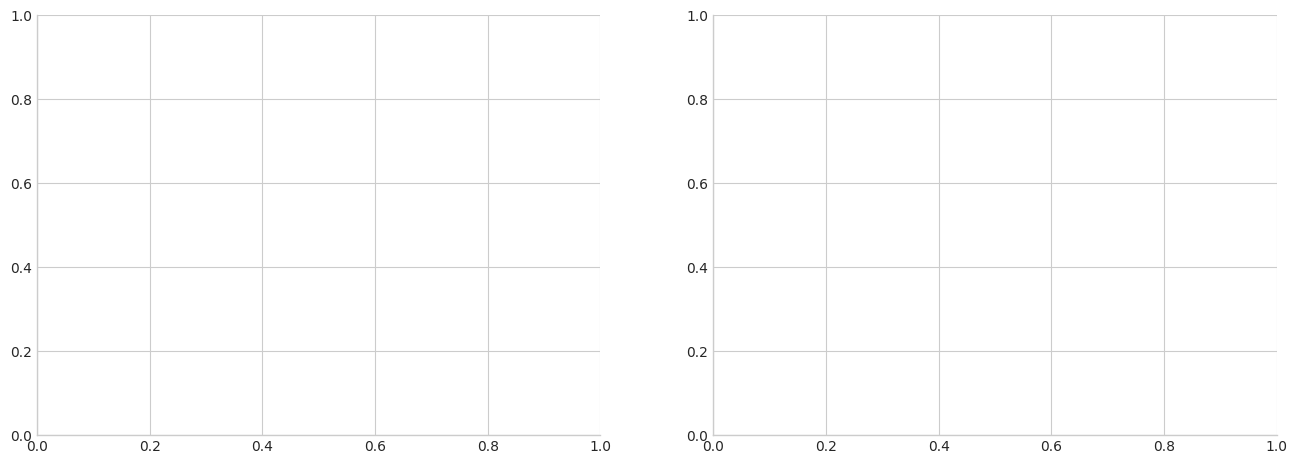

In [20]:
# ============================================================
#  Goal-Scorer Prediction – Model Comparison Pipeline
# ============================================================
"""
Comprehensive model comparison pipeline for goal-scorer prediction.

This script compares multiple models:
- Logistic Regression (baseline)
- Random Forest
- Support Vector Machine (SVM)
- Neural Network (MLP)

Generates professional visualizations and LaTeX tables for scientific papers.
"""

# ------------------------- Imports -------------------------
import warnings
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import (
    roc_auc_score,
    log_loss,
    brier_score_loss,
    roc_curve,
    classification_report,
    make_scorer
)
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

import statsmodels.api as sm
from scipy.stats import norm

warnings.filterwarnings("ignore", category=FutureWarning)

# Configure plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ===================== Feature Engineering (from original) =====================
class FeatureBuilder(BaseEstimator, TransformerMixin):
    """Creates basic features and cleans the DataFrame for goal-scorer prediction."""

    def __init__(self):
        self.drop_cols_ = []

    def fit(self, X, y=None):
        df = self._basic_features(X.copy())
        nunique_counts = df.nunique()
        self.drop_cols_ = nunique_counts[nunique_counts <= 1].index.tolist()
        return self

    def transform(self, X):
        df = self._basic_features(X.copy())
        df.drop(columns=self.drop_cols_, inplace=True, errors="ignore")
        df.fillna(0, inplace=True)
        return df

    @staticmethod
    def _basic_features(df):
        eps = 1e-5
        
        # Date processing
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        df["next_game_date"] = pd.to_datetime(df["next_game_date"], errors="coerce")
        df["days_until_next_game"] = (df["next_game_date"] - df["date"]).dt.days
        
        # Performance metrics
        df["xg_per_shot"] = df["avg_xg_last_3"] / (df["avg_shots_3"] + eps)
        df["momentum_xg"] = df["avg_xg_last_3"] / (df["avg_xg_last_5"] + eps)

        # Remove unnecessary columns (same as original)
        columns_to_drop = [
            "date", "round", "venue", "game_started", "player_name", "league",
            'opponent_strength', 'team_offensive_strength_last_3',
            'opponent_defensive_strength_last_3', 'team_offensive_strength_last_5',
            'team_offensive_strength_last_3_next_game',
            'team_offensive_strength_last_5_next_game',
            'opponent_defensive_strength_last_3_next_game',
            'diff_efficiency_3', 'avg_shots_3', 'average_minutes_last_3', 
            'avg_xg_last_3', 'xg_efficiency_last_3', 'avg_progressive_carries_3',
            'avg_take_ons_3', 'avg_passes_completed_3', 'avg_progressive_passes_3',
            'avg_touches_3', 'efficiency_last_3', "avg_g_per_90_last_3",
            "avg_progressive_passes_5", "avg_progressive_carries_5",
            "position", "momentum_xg", "xg_efficiency_last_5",
            "strengh_diff", "avg_passes_3", "efficiency_last_5",
            "is_post_transfer_match", "passes", "avg_passes_5",                                  
            "next_game_date", "offensive_defensive_multiply_last_5_next_game",
            "game_in_season", "team_strength_next_game", 
            "offensive_defensive_multiply_last_3_next_game",
            "opponent_defensive_strength", "team_offensive_strength_next_game",
            "avg_take_ons_5", "opponent_defensive_strength_next_game",
            "opponent_elo_next_game", "team_strength_next_game", "avg_goals_last_5",
            "goals_streak_3", "avg_shots_5", "avg_shots_on_target_3",
            "team_elo_next_game", "opponent_strength_next_game",
            "strength_diff_next_game", "goals_streak_5", "avg_goals_last_3"
        ]
        
        df.drop(columns=columns_to_drop, inplace=True, errors="ignore")
        return df


class ColumnDropper(BaseEstimator, TransformerMixin):
    """Randomly drops a fraction of columns for robustness testing."""

    def __init__(self, drop_frac=0.0, random_state=None):
        self.drop_frac = drop_frac
        self.random_state = random_state

    def fit(self, X, y=None):
        rng = np.random.RandomState(self.random_state)
        n_drop = int(len(X.columns) * self.drop_frac)
        self.cols_to_drop_ = (
            rng.choice(X.columns, n_drop, replace=False).tolist() if n_drop > 0 else []
        )
        return self

    def transform(self, X):
        return X.drop(columns=self.cols_to_drop_, errors="ignore")


# ======================== Metrics Utils ========================

def expected_calibration_error(y_true, y_prob, n_bins=15):
    """Calculate the Expected Calibration Error (ECE)."""
    bins = np.linspace(0, 1, n_bins + 1)
    binids = np.digitize(y_prob, bins) - 1
    ece = 0.0
    
    for b in range(n_bins):
        mask = binids == b
        if mask.any():
            accuracy = y_true[mask].mean()
            confidence = y_prob[mask].mean()
            ece += np.abs(accuracy - confidence) * mask.mean()
    
    return ece


def compute_metrics(y_true, y_prob):
    """Compute all evaluation metrics."""
    return {
        "AUC": roc_auc_score(y_true, y_prob),
        "Brier": brier_score_loss(y_true, y_prob),
        "ECE": expected_calibration_error(y_true, y_prob),
        "LogLoss": log_loss(y_true, y_prob),
        "N_Players": len(y_true),
        "Sum_True": y_true.sum(),
    }


# ====================== Model Definitions =====================

def get_model_configs():
    """Define all models with their configurations."""
    models = {
        'Random Forest': {
            'model': RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                min_samples_split=20,
                min_samples_leaf=10,
                random_state=42,
                n_jobs=-1
            ),
            'use_scaler': False,
            'calibrate': False
        },
        # 'SVM': {
        #     'model': SVC(
        #         kernel='rbf',
        #         C=1.0,
        #         gamma='scale',
        #         probability=True,
        #         random_state=42,
        #     ),
        #     'use_scaler': True,
        #     'calibrate': False
        # },
        'Neural Network': {
            'model': MLPClassifier(
                hidden_layer_sizes=(100, 50),
                activation='relu',
                solver='adam',
                alpha=0.01,
                batch_size='auto',
                learning_rate='constant',
                learning_rate_init=0.001,
                max_iter=500,
                random_state=42,
                early_stopping=True,
                validation_fraction=0.1,
                n_iter_no_change=10
            ),
            'use_scaler': True,
            'calibrate': False
        }
    }
    return models


# ====================== Training and Evaluation =====================

def train_and_evaluate_models(X_train, y_train, X_test, y_test, prep, dropper):
    """Train and evaluate all models."""
    models = get_model_configs()
    results = {}
    trained_models = {}
    
    # Preprocess data
    X_train_processed = dropper.transform(prep.transform(X_train))
    X_test_processed = dropper.transform(prep.transform(X_test))
    
    print("Training and evaluating models...")
    print("=" * 80)
    
    for name, config in models.items():
        print(f"\nTraining {name}...")
        
        # Scale if needed
        if config['use_scaler']:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_processed)
            X_test_scaled = scaler.transform(X_test_processed)
        else:
            X_train_scaled = X_train_processed
            X_test_scaled = X_test_processed
            scaler = None
        
        # Train model
        model = config['model']
        model.fit(X_train_scaled, y_train)
        
        # Calibrate if needed
        if config['calibrate']:
            print(f"  Calibrating {name}...")
            calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=3)
            calibrated_model.fit(X_train_scaled, y_train)
            final_model = calibrated_model
        else:
            final_model = model
        
        # Predictions
        y_pred_proba = final_model.predict_proba(X_test_scaled)[:, 1]
        
        # Store results
        results[name] = {
            'y_true': y_test,
            'y_prob': y_pred_proba
        }
        
        trained_models[name] = {
            'model': final_model,
            'scaler': scaler,
            'config': config
        }
        
        # Print metrics
        metrics = compute_metrics(y_test, y_pred_proba)
        print(f"  AUC: {metrics['AUC']:.4f}")
        print(f"  Brier: {metrics['Brier']:.4f}")
        print(f"  ECE: {metrics['ECE']:.4f}")
        print(f"  LogLoss: {metrics['LogLoss']:.4f}")
    
    return results, trained_models


# ====================== Cross-Validation =====================

def perform_cross_validation(X, y, prep, dropper, cv_folds=5):
    """Perform cross-validation for all models."""
    models = get_model_configs()
    cv_results = {}
    
    # Preprocess data
    X_processed = dropper.transform(prep.transform(X))
    
    print(f"\nPerforming {cv_folds}-fold cross-validation...")
    print("=" * 80)
    
    # Define scoring metrics
    scoring = {
        'auc': 'roc_auc',
        'brier': make_scorer(brier_score_loss, greater_is_better=False, needs_proba=True),
        'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
    }
    
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    for name, config in models.items():
        print(f"\nCross-validating {name}...")
        
        # Create pipeline
        steps = []
        if config['use_scaler']:
            steps.append(('scaler', StandardScaler()))
        
        if config['calibrate']:
            steps.append(('model', CalibratedClassifierCV(config['model'], method='isotonic', cv=3)))
        else:
            steps.append(('model', config['model']))
        
        pipeline = Pipeline(steps)
        
        # Perform cross-validation
        cv_scores = cross_validate(
            pipeline, X_processed, y, 
            cv=skf, 
            scoring=scoring, 
            n_jobs=-1,
            return_train_score=False
        )
        
        # Store results
        cv_results[name] = {
            'AUC_mean': -cv_scores['test_auc'].mean(),  # Note: AUC is not negated by make_scorer
            'AUC_std': cv_scores['test_auc'].std(),
            'Brier_mean': -cv_scores['test_brier'].mean(),  # Convert back from negative
            'Brier_std': cv_scores['test_brier'].std(),
            'LogLoss_mean': -cv_scores['test_log_loss'].mean(),  # Convert back from negative
            'LogLoss_std': cv_scores['test_log_loss'].std()
        }
        
        # Actually, let's fix the AUC sign issue
        cv_results[name]['AUC_mean'] = cv_scores['test_auc'].mean()
        
        print(f"  AUC: {cv_results[name]['AUC_mean']:.4f} ± {cv_results[name]['AUC_std']:.4f}")
        print(f"  Brier: {cv_results[name]['Brier_mean']:.4f} ± {cv_results[name]['Brier_std']:.4f}")
        print(f"  LogLoss: {cv_results[name]['LogLoss_mean']:.4f} ± {cv_results[name]['LogLoss_std']:.4f}")
    
    return cv_results


# ====================== Plotting Functions =====================

def create_model_comparison_plots(results_dict, save_path="model_comparison"):
    """Create comprehensive model comparison plots."""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')
    
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
    
    # 1. ROC Curves
    for i, (name, data) in enumerate(results_dict.items()):
        y_true, y_prob = data['y_true'], data['y_prob']
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        roc_auc = roc_auc_score(y_true, y_prob)
        ax1.plot(fpr, tpr, color=colors[i], lw=2.5,
                label=f'{name} (AUC: {roc_auc:.3f})')
    
    ax1.plot([0, 1], [0, 1], 'k--', alpha=0.6)
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curves')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Calibration Plot
    ax2.plot([0, 1], [0, 1], 'k--', alpha=0.6, label='Perfect calibration')
    
    for i, (name, data) in enumerate(results_dict.items()):
        y_true, y_prob = data['y_true'], data['y_prob']
        fraction_pos, mean_pred = calibration_curve(y_true, y_prob, n_bins=15)
        ece = expected_calibration_error(y_true, y_prob)
        ax2.plot(mean_pred, fraction_pos, 's-', color=colors[i], 
                label=f'{name} (ECE: {ece:.3f})')
    
    ax2.set_xlabel('Mean Predicted Probability')
    ax2.set_ylabel('Fraction of Positives')
    ax2.set_title('Calibration Plot')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Metrics Comparison Bar Plot
    metrics_df = []
    for name, data in results_dict.items():
        metrics = compute_metrics(data['y_true'], data['y_prob'])
        metrics['Model'] = name
        metrics_df.append(metrics)
    
    metrics_df = pd.DataFrame(metrics_df)
    
    x_pos = np.arange(len(metrics_df))
    width = 0.35
    
    ax3.bar(x_pos - width/2, metrics_df['AUC'], width, label='AUC', alpha=0.8)
    ax3.bar(x_pos + width/2, 1 - metrics_df['Brier'], width, label='1 - Brier', alpha=0.8)
    
    ax3.set_xlabel('Models')
    ax3.set_ylabel('Score')
    ax3.set_title('Model Performance Metrics')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(metrics_df['Model'], rotation=45)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Prediction Distribution
    for i, (name, data) in enumerate(results_dict.items()):
        y_prob = data['y_prob']
        ax4.hist(y_prob, bins=20, alpha=0.7, label=name, color=colors[i])
    
    ax4.set_xlabel('Predicted Probability')
    ax4.set_ylabel('Frequency')
    ax4.set_title('Prediction Probability Distributions')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=300, bbox_inches='tight')
    plt.show()


# ====================== LaTeX Table Generation =====================

def create_model_comparison_latex_table(results_dict, save_path="model_comparison_table"):
    """Create model comparison table in LaTeX format."""
    metrics_data = []
    
    for name, data in results_dict.items():
        y_true, y_prob = data['y_true'], data['y_prob']
        metrics = compute_metrics(y_true, y_prob)
        metrics['Model'] = name
        metrics_data.append(metrics)
    
    df_metrics = pd.DataFrame(metrics_data)
    
    latex_table = """\\begin{table}[htbp]
\\centering
\\caption{Model Performance Comparison}
\\label{tab:model_comparison}
\\begin{tabular}{|l|c|c|c|c|c|c|}
\\hline
\\textbf{Model} & \\textbf{AUC-ROC} & \\textbf{Brier Score} & \\textbf{ECE} & \\textbf{Log Loss} & \\textbf{Goals} & \\textbf{N Players} \\\\
\\hline
"""
    
    # Sort by AUC descending
    df_metrics = df_metrics.sort_values('AUC', ascending=False)
    
    for _, row in df_metrics.iterrows():
        model_name = row['Model'].replace('_', '\\_')
        
        # Highlight best performance
        auc_str = f"\\textbf{{{row['AUC']:.4f}}}" if row['AUC'] == df_metrics['AUC'].max() else f"{row['AUC']:.4f}"
        brier_str = f"\\textbf{{{row['Brier']:.4f}}}" if row['Brier'] == df_metrics['Brier'].min() else f"{row['Brier']:.4f}"
        ece_str = f"\\textbf{{{row['ECE']:.4f}}}" if row['ECE'] == df_metrics['ECE'].min() else f"{row['ECE']:.4f}"
        logloss_str = f"\\textbf{{{row['LogLoss']:.4f}}}" if row['LogLoss'] == df_metrics['LogLoss'].min() else f"{row['LogLoss']:.4f}"
        
        latex_table += f"{model_name} & {auc_str} & {brier_str} & {ece_str} & {logloss_str} & {row['Sum_True']:.0f} & {row['N_Players']:,} \\\\\n"
    
    latex_table += """\\hline
\\end{tabular}
\\begin{tablenotes}
\\small
\\item Note: Best performance in each metric is highlighted in bold.
\\item AUC-ROC: Area Under the ROC Curve (higher is better)
\\item Brier Score: Brier Score (lower is better)
\\item ECE: Expected Calibration Error (lower is better)
\\item Log Loss: Logarithmic Loss (lower is better)
\\end{tablenotes}
\\end{table}

"""
    
    with open(f"{save_path}.tex", "w") as f:
        f.write(latex_table)
    
    print(f"Model comparison table saved to {save_path}.tex")
    return df_metrics


def create_cv_results_latex_table(cv_results, save_path="cv_results_table"):
    """Create cross-validation results table in LaTeX format."""
    latex_table = """\\begin{table}[htbp]
\\centering
\\caption{Cross-Validation Results (5-Fold)}
\\label{tab:cv_results}
\\begin{tabular}{|l|c|c|c|}
\\hline
\\textbf{Model} & \\textbf{AUC-ROC} & \\textbf{Brier Score} & \\textbf{Log Loss} \\\\
\\hline
"""
    
    # Sort by AUC mean descending
    sorted_models = sorted(cv_results.items(), 
                          key=lambda x: x[1]['AUC_mean'], reverse=True)
    
    best_auc = max(cv_results.values(), key=lambda x: x['AUC_mean'])['AUC_mean']
    best_brier = min(cv_results.values(), key=lambda x: x['Brier_mean'])['Brier_mean']
    best_logloss = min(cv_results.values(), key=lambda x: x['LogLoss_mean'])['LogLoss_mean']
    
    for name, results in sorted_models:
        model_name = name.replace('_', '\\_')
        
        # Highlight best performance
        auc_str = f"\\textbf{{{results['AUC_mean']:.4f} ± {results['AUC_std']:.4f}}}" if results['AUC_mean'] == best_auc else f"{results['AUC_mean']:.4f} ± {results['AUC_std']:.4f}"
        brier_str = f"\\textbf{{{results['Brier_mean']:.4f} ± {results['Brier_std']:.4f}}}" if results['Brier_mean'] == best_brier else f"{results['Brier_mean']:.4f} ± {results['Brier_std']:.4f}"
        logloss_str = f"\\textbf{{{results['LogLoss_mean']:.4f} ± {results['LogLoss_std']:.4f}}}" if results['LogLoss_mean'] == best_logloss else f"{results['LogLoss_mean']:.4f} ± {results['LogLoss_std']:.4f}"
        
        latex_table += f"{model_name} & {auc_str} & {brier_str} & {logloss_str} \\\\\n"
    
    latex_table += """\\hline
\\end{tabular}
\\begin{tablenotes}
\\small
\\item Note: Results show mean ± standard deviation across 5 folds.
\\item Best performance in each metric is highlighted in bold.
\\end{tablenotes}
\\end{table}

"""
    
    with open(f"{save_path}.tex", "w") as f:
        f.write(latex_table)
    
    print(f"Cross-validation results table saved to {save_path}.tex")


# ====================== Feature Importance Analysis =====================

def analyze_feature_importance(trained_models, feature_names, save_path="feature_importance"):
    """Analyze and visualize feature importance for applicable models."""
    importance_data = {}
    
    # Extract feature importance where available
    for name, model_info in trained_models.items():
        model = model_info['model']
        
        if hasattr(model, 'feature_importances_'):
            # Random Forest
            importance_data[name] = model.feature_importances_
        elif hasattr(model, 'coef_') and name == 'Logistic Regression':
            # Logistic Regression - use absolute coefficients
            importance_data[name] = np.abs(model.coef_[0])
    
    if not importance_data:
        print("No feature importance data available")
        return
    
    # Create visualization
    fig, axes = plt.subplots(1, len(importance_data), figsize=(5*len(importance_data), 8))
    if len(importance_data) == 1:
        axes = [axes]
    
    for i, (name, importance) in enumerate(importance_data.items()):
        # Get top features
        top_indices = np.argsort(importance)[-15:]  # Top 15 features
        top_features = [feature_names[j] for j in top_indices]
        top_importance = importance[top_indices]
        
        axes[i].barh(range(len(top_features)), top_importance)
        axes[i].set_yticks(range(len(top_features)))
        axes[i].set_yticklabels(top_features)
        axes[i].set_xlabel('Importance')
        axes[i].set_title(f'{name}\nFeature Importance')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=300, bbox_inches='tight')
    plt.show()


# ====================== Main Execution Function =====================

def main_model_comparison(X_train, y_train, X_test, y_test, output_dir="model_comparison_results"):
    """
    Main function to run complete model comparison pipeline.
    
    Args:
        X_train, y_train: Training data
        X_test, y_test: Test data
        output_dir: Directory to save results
    """
    # Create output directory
    Path(output_dir).mkdir(exist_ok=True)
    
    print("Goal-Scorer Prediction: Model Comparison Pipeline")
    print("=" * 80)
    
    # Initialize preprocessing
    prep = FeatureBuilder()
    dropper = ColumnDropper(drop_frac=0.0, random_state=42)
    
    # Fit preprocessing on training data
    prep.fit(X_train, y_train)
    dropper.fit(prep.transform(X_train), y_train)
    
    print(f"Features after preprocessing: {prep.transform(X_train).shape[1]}")
    
    # Train and evaluate models
    results, trained_models = train_and_evaluate_models(
        X_train, y_train, X_test, y_test, prep, dropper
    )
    
    # Perform cross-validation
    cv_results = perform_cross_validation(
        X_train, 
        y_train, 
        prep, dropper
    )
    
    # Create visualizations
    create_model_comparison_plots(results, f"{output_dir}/model_comparison_plots")
    
    # Generate LaTeX tables
    df_metrics = create_model_comparison_latex_table(results, f"{output_dir}/model_comparison_table")
    create_cv_results_latex_table(cv_results, f"{output_dir}/cv_results_table")
    
    # Feature importance analysis
    feature_names = prep.transform(X_train).columns.tolist()
    analyze_feature_importance(trained_models, feature_names, f"{output_dir}/feature_importance")
    
    print("\n" + "=" * 80)
    print("Model comparison pipeline completed!")
    print(f"Results saved to: {output_dir}/")
    print("Generated files:")
    print("- model_comparison_plots.png")
    print("- model_comparison_table.tex")
    print("- cv_results_table.tex")
    print("- feature_importance.png")
    
    return results, cv_results, trained_models, df_metrics


# ====================== Usage Example =====================

if __name__ == "__main__":

	results, cv_results, models, metrics_df = main_model_comparison(
		X_train, y_train, X_validation, y_validation
	)


### compare others models